<div style="padding:20px;color:white;margin:0;font-size:40px;text-align:center;display:fill;border-radius:10px;background-color:#c54E58;overflow:hidden ;font-family: 'Lucida Console'"><b> Introduction </b></div>

![Introduction ](https://img.freepik.com/free-photo/happy-male-candidate-greeting-member-human-resource-team-job-interview-office_637285-6567.jpg?w=826&t=st=1701696316~exp=1701696916~hmac=d919aad11adb07ceb8f8f8bc9b4261776afc4e4268aed486ff8499b94710ea49)


<div style="border-radius:20px ;border:3px solid #c54E58 ;color : Blue;  padding: 15px; font-size: 14pt; background-color: ; text-align:left">
    
<h2>Welcome to my project that focused on predicting employee turnover and set a risk level for each employee.</h2>
    
In today's dynamic workplace landscape, understanding and anticipating factors influencing employee retention are crucial for organizational success. 
Through advanced analytics and machine learning, our project aims to unveil patterns and indicators contributing to turnover, providing valuable insights for proactive talent management and fostering a more resilient and engaged workforce.
Join us on this journey to harness the power of data to enhance employee retention strategies and optimize organizational performance.
    
The act of an employee quitting their job can have a negative impact on the workplace, reducing efficiency and productivity. This study aims to investigate the various factors that contribute to employees leaving their jobs. 
These factors can range from external reasons, such as a negative workplace environment that can lead to an employee feeling undervalued and unappreciated, to personal reasons, such as work-life imbalances or the desire to seek a different career path. 
Understanding these reasons is crucial for employers so that they can take appropriate measures to create a better workplace environment for their employees. To achieve this, we have gathered relevant data sets from Kaggle that contain information about employees. By studying these data sets, we aim to form a model that accurately predicts whether an employee is likely to quit or not.


<div style="border-radius:20px ;border:3px solid gray ;color : blue;  padding: 15px; background-color:  rgba(135, 206, 235, 0.4); text-align:left">
    
# Table of Contants
*  [Methodology to analyse each feature](#met)
*  [Overview](#overv)
*  [Catalog of used functions' implementaions](#fun)
*  [Considering Technical Reasons](#tech)
    -  [Department](#dep)
    -  [Job Roles/Levels](#job)
    -  [Monthly Income](#income)
    -  [Experience](#exp)
    -  [Over Time](#over)
    -  [Level of Satisfaction](#sat)
*  [Considering Personal Reasons](#per)
    -  [Age](#age)
    -  [Gender](#gen)
    -  [Educational background](#edu)
    -  [Marital Status](#mar)
    -  [Distance From Home](#dis)    
    -  [WorkLife Balance](#wlb)    
*  [Statistical Analysis](#stat)
    -  [Correlation Matrix](#corrmat)
    -  [Point biserial ](#bi)    
    -  [T Test summary](#ttest)
    -  [Chi Square ( $\chi^2$ ) Test summary](#chi)
*  [Predictive Model (Logistic regression)](#model)
    -  [Bootstrap Confidence interval](#boot)
    -  [Set Risk Level and Attrition liklehood Features](#risk)
    -  [Feature Importance according to model](#import)
    -  [Interactive dashboard that predict Risk/Liklehood](#risk)
*  [Refrences](#ref)    

## NOTE: 
my be you want to install some packages that aren't defined on your enviroment just do like that   

```
!pip install scikit_posthocs
!pip install gradio
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.gridspec as gridspec
import scikit_posthocs as sp
import statsmodels.api as sm
import gradio as gr
import warnings
warnings.filterwarnings('ignore')

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from ipywidgets import Dropdown, IntSlider, interact
from scipy import stats
from scipy.stats  import t 
from plotly.subplots import make_subplots

from category_encoders import OneHotEncoder

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score, classification_report, roc_auc_score, precision_score , recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
%matplotlib inline

In [4]:
df = pd.read_csv('Employee-Attrition.csv')

In [5]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

### Let's rename some categorical values to a meaningful names

In [6]:
def ReplaceIt(i,st=""):
    df[st]=df[st].replace(1-i,'Low')
    df[st]=df[st].replace(2-i,'Medium')
    df[st]=df[st].replace(3-i,'High')
    df[st]=df[st].replace(4-i,'Very High')

CatList = ["EnvironmentSatisfaction", "JobSatisfaction","RelationshipSatisfaction","WorkLifeBalance","StockOptionLevel"]

i=0
for st in CatList:
    if st =="StockOptionLevel":
        i = i+1
    ReplaceIt(i,st)

In [7]:
df["JobLevel"] = df["JobLevel"].replace(
    {1:"Entry Level",
     2:"Junior Level",
     3:"Mid Level",
     4:"Senior Level",
     5:"Executive Level"}
)

In [8]:
df["Education"] = df["Education"].replace(
    {1:"Below College",
     2:"College",
     3:"Bachelor",
     4:"Master",
     5:"Doctor"}
)

In [9]:
df['PerformanceRating']=df['PerformanceRating'].replace(3,'Excellent')
df['PerformanceRating']=df['PerformanceRating'].replace(4,'Outstanding')

<div style="border-radius:20px ;border:3px solid gray ;color : blue;  padding: 15px; background-color:  rgba(135, 206, 235, 0.4); text-align:left">
<a id="met"></a>

# My methodology to analyse features:     
*  Take an overview of our data (ckeck for null, duplicates,... and discover the central tendency and variability of features).Divide features into technical features and personal ones.
*  Formulate our hypothesis that (Null $H_0$: Any feature has no effect on attrition and each group of data is independent of others in whole features).At each feature we use the appropriate statistical test to check our hypothesis: 
    - **T_test** for two groups of numerical groups.  
    - **ANOVA** if more than two groups.  
    - **PostHoc** to know exactly any pair of groups are significantly independent (if needed).    
    - **Chi square $\chi^2$** test for two categorical variables.  
*  Utilize visual tools like histograms, box plots, scatter plots, and pie charts to uncover patterns or connections between this features and attrition or other features also according to our testing needs.
*  Then We incorporate our observations based on these tests and visualizations.

# <div style="padding:20px;color:white;margin:0;font-size:35px;text-align:center;display:fill;border-radius:10px;background-color:#c54E58;overflow:hidden; font-family: 'Lucida Console' "><b> overview </b></div>

<a id="overv"></a>


In [10]:
df.describe()

Age    DailyRate  DistanceFromHome  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000         1470.0   
mean     36.923810   802.485714          9.192517            1.0   
std       9.135373   403.509100          8.106864            0.0   
min      18.000000   102.000000          1.000000            1.0   
25%      30.000000   465.000000          2.000000            1.0   
50%      36.000000   802.000000          7.000000            1.0   
75%      43.000000  1157.000000         14.000000            1.0   
max      60.000000  1499.000000         29.000000            1.0   

       EmployeeNumber   HourlyRate  JobInvolvement  MonthlyIncome  \
count     1470.000000  1470.000000     1470.000000    1470.000000   
mean      1024.865306    65.891156        2.729932    6502.931293   
std        602.024335    20.329428        0.711561    4707.956783   
min          1.000000    30.000000        1.000000    1009.000000   
25%        491.250000    48.000000        2.000000    2911.000000   
50%       1020.500000    66.000000        3.000000    4919.000000   
75%       1555.750000    83.750000        3.000000    8379.000000   
max       2068.000000   100.000000        4.000000   19999.000000   

        MonthlyRate  NumCompaniesWorked  PercentSalaryHike  StandardHours  \
count   1470.000000         1470.000000        1470.000000         1470.0   
mean   14313.103401            2.693197          15.209524           80.0   
std     7117.786044            2.498009           3.659938            0.0   
min     2094.000000            0.000000          11.000000           80.0   
25%     8047.000000            1.000000          12.000000           80.0   
50%    14235.500000            2.000000          14.000000           80.0   
75%    20461.500000            4.000000          18.000000           80.0   
max    26999.000000            9.000000          25.000000           80.0   

       TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
count        1470.000000            1470.000000     1470.000000   
mean           11.279592               2.799320        7.008163   
std             7.780782               1.289271        6.126525   
min             0.000000               0.000000        0.000000   
25%             6.000000               2.000000        3.000000   
50%            10.000000               3.000000        5.000000   
75%            15.000000               3.000000        9.000000   
max            40.000000               6.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000

In [11]:
print(df.shape)
print(df.duplicated().sum())

tabel = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isna().sum(),
    'Type':df.dtypes.values
})
display(tabel)

(1470, 35)
0


Unique  Null    Type
Age                           43     0   int64
Attrition                      2     0  object
BusinessTravel                 3     0  object
DailyRate                    886     0   int64
Department                     3     0  object
DistanceFromHome              29     0   int64
Education                      5     0  object
EducationField                 6     0  object
EmployeeCount                  1     0   int64
EmployeeNumber              1470     0   int64
EnvironmentSatisfaction        4     0  object
Gender                         2     0  object
HourlyRate                    71     0   int64
JobInvolvement                 4     0   int64
JobLevel                       5     0  object
JobRole                        9     0  object
JobSatisfaction                4     0  object
MaritalStatus                  3     0  object
MonthlyIncome               1349     0   int64
MonthlyRate                 1427     0   int64
NumCompaniesWorked            10     0   int64
Over18                         1     0  object
OverTime                       2     0  object
PercentSalaryHike             15     0   int64
PerformanceRating              2     0  object
RelationshipSatisfaction       4     0  object
StandardHours                  1     0   int64
StockOptionLevel               4     0  object
TotalWorkingYears             40     0   int64
TrainingTimesLastYear          7     0   int64
WorkLifeBalance                4     0  object
YearsAtCompany                37     0   int64
YearsInCurrentRole            19     0   int64
YearsSinceLastPromotion       16     0   int64
YearsWithCurrManager          18     0   int64

### Amazing
#### No duplicate, no NULL 
but those 4 columns must be deleted

```python
[
    'EmployeeCount',
    'Over18',
    'StandardHours',
    'EmployeeNumber'
]
```
as first 3 has one value(very low cardinality) , and the fourth will not be usefull (high cardinality) 


In [12]:
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], inplace=True)

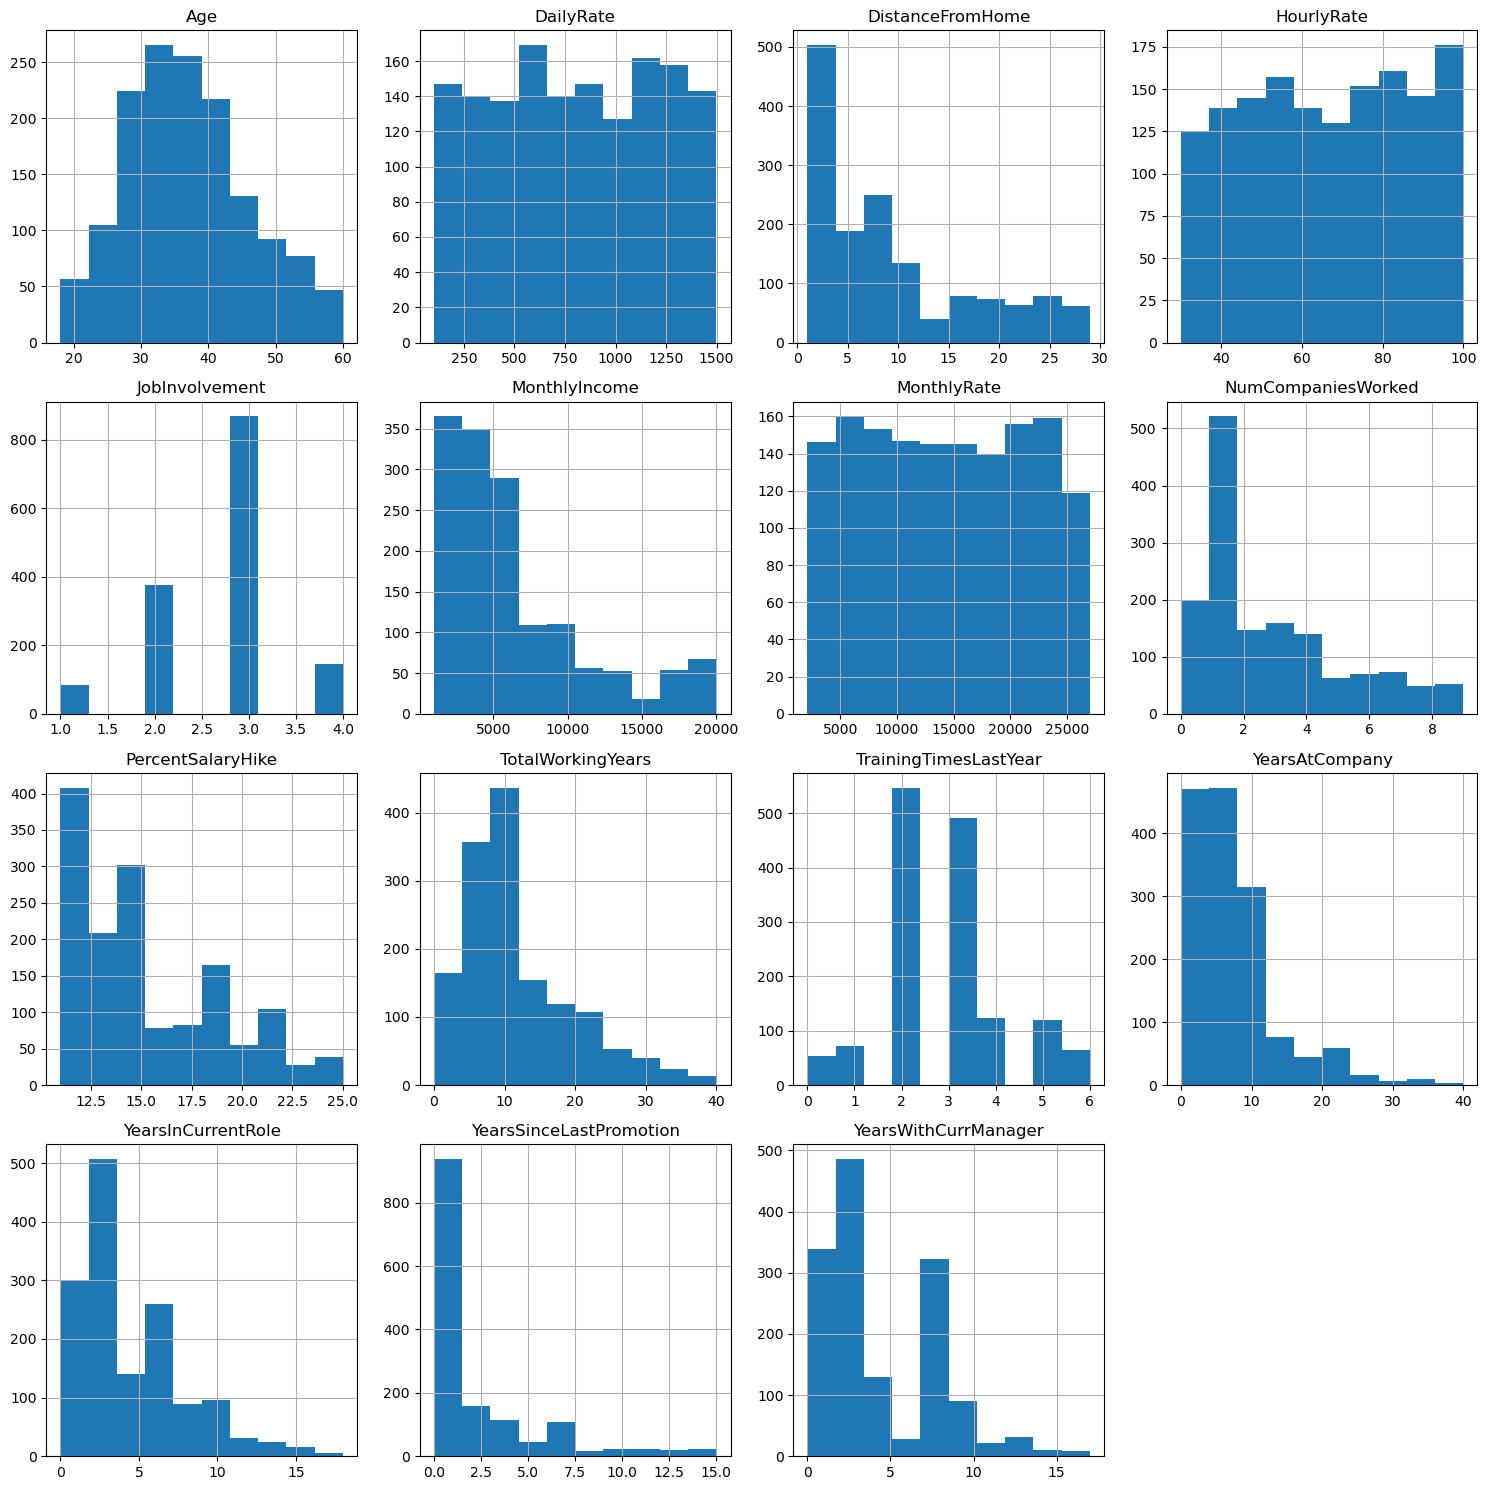

In [13]:
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

## 	What is the overall attrition rate in the organization?

Text(0.5, 0.98, 'Overall atrrition')

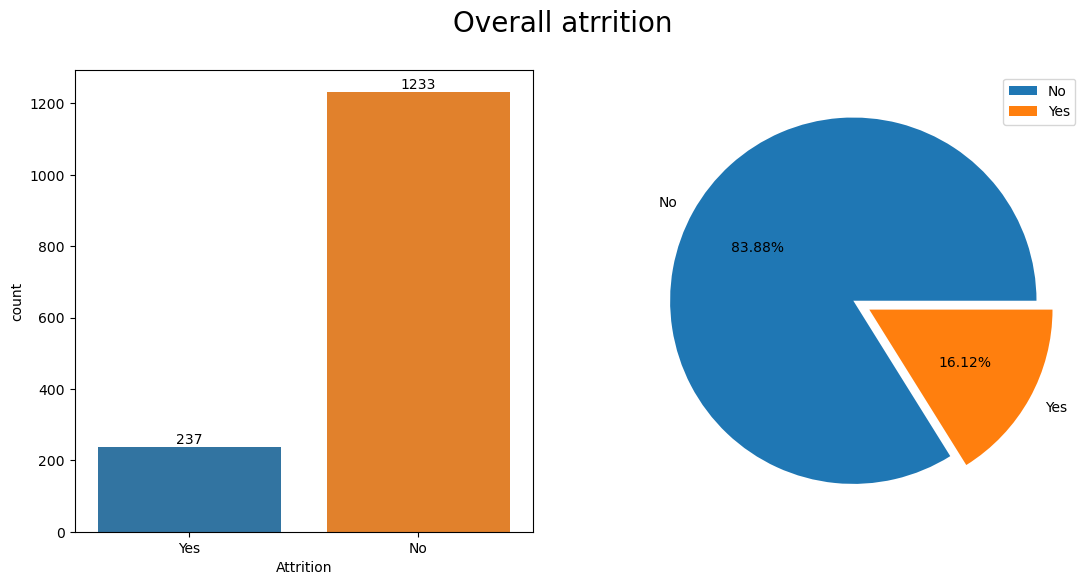

In [14]:
fig, axes = plt.subplots(1,2,figsize=(13,6))
sns.countplot(x="Attrition", data=df,ax =axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[1].pie(df["Attrition"].value_counts().values, labels=df["Attrition"].value_counts().index,autopct='%1.2f%%',explode=[0, 0.1])
axes[1].legend()
plt.suptitle("Overall atrrition",fontsize=20)

# Catalog of used functions' implementations:
<a id="fun"></a>


In [15]:
def TTest(val="", group=""):
    '''Apply t test between two groups seperated by "group" column in given value.'''
    uni = df[group].unique()
    result = stats.ttest_ind(df[df[group]==uni[0]][val] , df[df[group]==uni[1]][val])
    return result.statistic,stats.t.ppf(1-.05/2,result.df), result.pvalue

In [16]:
def ApplyTTest(group=""):
    '''Apply t test between all groups seperated by "group" column in all numerical value.'''
    T_Score = {}
    CriticalT = {}
    p_values = {}

    for col in df.select_dtypes("number").columns:
        T_Score[col],CriticalT[col],p_values[col] =TTest(col, group)
    columns = list(T_Score.keys())
    values = list(T_Score.values())
    critical = list(CriticalT.values())

    test_df = pd.DataFrame(
        {"Features":columns,
        "T Value":values,
        "Critical Value":critical}
                          )

    test_df["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]
    test_df["P_value"] = test_df["P_value"].astype(float)
    test_df["Result"] = test_df["P_value"].map(lambda x:"Can't Reject" if x > 0.05 else "Reject")
    return test_df, p_values

In [17]:
def CalcMEE(cat="", num="", t=1.96):
    '''Calculate max estimation error in num between cat groups.'''    
    #t= 1.96 -> 0.95 CI
    n ={}
    std= {}
    EstError ={}
    Average = {}
    for col in df[cat].unique():
        group = df[df[cat] == col][num]
        Q1, Q3 = group.quantile([0.25, 0.75])
        IQR = Q3 - Q1
        upper = Q3 +1.5*IQR
        lower = Q1 - 1.5*IQR
        mask = group.between(lower, upper)
        group = group[mask]
        n[col] = len(group)
        std[col] = group.std()
        Average[col] = group.mean()
        t= stats.t.ppf(q=1-.05/2,df=len(group)-1)        
        EstError[col] = t* std[col] / np.sqrt(n[col])
    columns = list(n.keys())
    N = list(n.values())
    Std = list(std.values())
    E = list(EstError.values())
    Avg = list(Average.values())
    test_df = pd.DataFrame(
        {cat:columns,
        "Total number":N,
        "Standard Deviation":Std,
         "Mean":Avg,
        "Max Error":E,
        }
                          )
    test_df["Max Error"] = ["+/- "+ str(round(e,4)) for e in E]
    return test_df

In [18]:
def SpecialCalcMEE(cat="", num="", t=1.96):
    '''Same as CalcMME but divide groups by attrition also.'''    
    #t= 1.96 -> 0.95 CI
    n ={}
    std= {}
    EstError ={}
    Average = {}
    columns=[]
    
    Att =df[df["Attrition"]=="Yes"]
    NoAtt =df[df["Attrition"]=="No"]

    for col in df[cat].unique():
        group = Att[Att[cat] == col][num]
        colname = col+"-Yes"
        columns.append(colname)
        Q1, Q3 = group.quantile([0.25, 0.75])
        IQR = Q3 - Q1
        upper = Q3 +1.5*IQR
        lower = Q1 - 1.5*IQR
        mask = group.between(lower, upper)
        group = group[mask]
        n[colname] = len(group)
        std[colname] = group.std()
        Average[colname] = group.mean()
        t= stats.t.ppf(q=1-.05/2,df=len(group)-1)
        EstError[colname] = t* std[colname] / np.sqrt(n[colname])
        
        
        group = NoAtt[NoAtt[cat] == col][num]
        colname = col+"-No"
        columns.append(colname)
        Q1, Q3 = group.quantile([0.25, 0.75])
        IQR = Q3 - Q1
        upper = Q3 +1.5*IQR
        lower = Q1 - 1.5*IQR
        mask = group.between(lower, upper)
        group = group[mask]
        n[colname] = len(group)
        std[colname] = group.std()
        Average[colname] = group.mean()
        t= stats.t.ppf(q=1-.05/2,df=len(group)-1)
        EstError[col] = t* std[colname] / np.sqrt(n[colname])
        
    N = list(n.values())
    Std = list(std.values())
    E = list(EstError.values())
    Avg = list(Average.values())
    
    test_df = pd.DataFrame(
        {cat:columns,
        "Total number":N,
        "Standard Deviation":Std,
         "Mean":Avg,
        "Max Error":E,
        }
                          )
    test_df["Max Error"] = ["+/- "+ str(round(e,4)) for e in E]
    return test_df

In [19]:
def Plot(dep=""):
    '''Plot Attrition per department.'''
    Depatment=df.groupby(['Department','Attrition'])["Age"].count().reset_index(name='Counts')
    Depatment=Depatment[Depatment["Department"]==dep]
    fig, axes = plt.subplots(1,2,figsize=(13,6))
    sns.barplot(x="Attrition",y="Counts", data=Depatment,ax =axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container)
    axes[1].pie(Depatment["Counts"], labels=Depatment["Attrition"].value_counts().index,autopct='%1.2f%%',explode=[0, 0.1])
    axes[1].legend()
    plt.suptitle(dep,fontsize=20)

In [20]:
def ChiSquared(cat1="", cat2="Attrition"):
    '''Do Chi square test between two given categories features.'''
    contingency_table = pd.crosstab(df[cat1], df[cat2])
    chi2, p_value, deg, _ = stats.chi2_contingency(contingency_table)
    CriticalChi = stats.chi2.ppf(0.95, deg)
    return chi2,CriticalChi, p_value

In [21]:
def plotP(p_values,st="", ISchi = False, tit =""):
    '''Plot p values of results of ANOVA test or chi.'''
    plt.figure(figsize=(12,6))
    keys = list(p_values.keys())
    values = list(p_values.values())
    sorted_value_index = list(reversed(np.argsort(values)))
    sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
    keys = list(sorted_dict.keys())
    values = list(sorted_dict.values())
    
    sns.barplot(x=keys, y=values, palette='rocket')
    if tit =="": 
        if ISchi:
            plt.title(f"P_scores Comparison according Chi Square test between Categorical variables and Atrrition")
        else:
            plt.title(f"Anova Test P_score Comparison within {st} Groups")
    else:
        plt.title(tit)

    plt.axhline(y=0.05,color='red',linestyle ="--", label="P_value = 0.05")
    plt.legend()

    plt.xticks(rotation=90)

    for index,value in enumerate(values):
        plt.text(index,value,round(value,3), ha="center", va="bottom")
    plt.show()

In [22]:
def SingleANOVA(st="", num=""):
    '''Apply ANOVA test to all numerical values of groups based on given cat feature st.'''
    f_scores = {}
    p_values = {}

    Arg = []

    for col in df[st].unique():
        Arg.append(df[num][df[st] == col])

    f_score, p_value = stats.f_oneway(*Arg)
    dof_within = len(df) - len(Arg) 
    dof_between = len(Arg) -1 
    CriticalF = stats.f.ppf(1-0.05,dof_between,dof_within )
    
    return f_score,p_value, CriticalF

In [23]:
def SpecialSingleANOVA(st="", num=""):
    '''Same as SingleANOVA function but it divide groups by attrition and the given st.'''
    f_scores = {}
    p_values = {}

    Arg = []
    
    Att = df[df["Attrition"]=="Yes"]
    for col in Att[st].unique():
        Arg.append(Att[num][Att[st] == col])

        
    NoAtt = df[df["Attrition"]=="No"]
    for col in NoAtt[st].unique():
        Arg.append(NoAtt[num][NoAtt[st] == col])
    
    f_score, p_value = stats.f_oneway(*Arg)
    dof_within = len(df) - len(Arg) 
    dof_between = len(Arg) -1 
    CriticalF = stats.f.ppf(1-0.05,dof_between,dof_within )
    
    return f_score,p_value, CriticalF

In [24]:
def ANOVA(st=""):
    '''Apply ANOVA test to all numerical values of groups based on given cat feature st.'''
    f_scores = {}
    p_values = {}
    CriticalF = {}


    for num in df.select_dtypes("number").columns:
        Arg = []
        
        f_scores[num],p_values[num], CriticalF[num] = SingleANOVA(st, num)
    
    plotP(p_values,st)
    return f_scores,p_values

In [25]:
def SpecialANOVA(st=""):
    '''Same as ANOVA function but it divide groups by attrition and the given st.'''
    f_scores = {}
    p_values = {}
    CriticalF = {}


    for num in df.select_dtypes("number").columns:
        Arg = []
        
        f_scores[num],p_values[num], CriticalF[num] = SpecialSingleANOVA(st, num)
    
    plotP(p_values,st)
    return f_scores,p_values

In [26]:
def PlotErrors(p_values,st ="" ,ISchi = False):
    '''Plot error bar between given p values with p = 0.5'''
    plt.figure(figsize=(12,6))

    x= list(p_values.keys())
    y= list(p_values.values())
    y_errormin =len(x) *[0.5]
    y_errormax =len(x) *[0.45]

    y_error =[y_errormin, y_errormax]

    plt.errorbar(x, y,
                 yerr = y_error,
                 fmt='o',capsize=10)
    plt.xticks(rotation=90)

    plt.axhline(y=0.5,color='red')
    if ISchi:
        plt.title(f"Chi Square P_score Error bar between Categorical features and Attrition")
    else:
        plt.title(f"ANOVA Test P_score Comparison within {st} Groups")


In [27]:
def PlotChi(keys,values):
    '''Bar plot for chi square results.'''
    plt.figure(figsize=(12,6))
    sorted_value_index = list(reversed(np.argsort(values)))
    sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
    keys = list(sorted_dict.keys())
    values = list(sorted_dict.values())
    
    sns.barplot(x=keys, y=values, palette="mako")
    plt.xticks(rotation=90)
    plt.title("Chi2 Statistic Value of each Categorical Columns with Attrition",fontweight="black")
    for index,value in enumerate(values):
        plt.text(index,value,round(value,2),ha="center",va="bottom")
    plt.show()

In [28]:
def AddPercentage(Df, st=""):
    '''Add percentage column to given Df to use in annot bar plot.'''
    lenght = len(Df[st])
    Df["percent"]=lenght*[""]
    i=0
    while i <lenght :
        Sum = Df.iloc[i,2] +Df.iloc[i+1,2]
        prc1 = round((Df.iloc[i,2] / Sum) * 100 , 2)
        Df.iloc[i,3] = str(prc1) + ' %'
        prc2= round( (Df.iloc[i+1,2] / Sum )* 100,2)
        Df.iloc[i+1,3] = str(prc2) + ' %'
        i =i+2 
    return Df

In [29]:
def PlotPies(st=""):
    '''Plot four beside pie charts.'''
    bus=df.groupby([st,'Attrition'],as_index=False)['Age'].count()
    bus.rename(columns={'Age':'Count'},inplace=True)
    fig=go.Figure()
    fig = make_subplots(rows=1, cols=4,
                        specs=[[{"type": "pie"}, {"type": "pie"},{"type": "pie"}, {"type": "pie"}]],
                        subplot_titles=('Very High', 'High','Medium','Low'))

    fig.add_trace(go.Pie(values=bus[bus[st]=='Very High']['Count'],labels=bus[bus[st]=='Very High']['Attrition'],pull=[0,0.1],showlegend=False)
                  ,row=1,col=1)
    fig.add_trace(go.Pie(values=bus[bus[st]=='High']['Count'],labels=bus[bus[st]=='High']['Attrition'],pull=[0,0.1],showlegend=False)
                  ,row=1,col=2)
    fig.add_trace(go.Pie(values=bus[bus[st]=='Medium']['Count'],labels=bus[bus[st]=='Medium']['Attrition'],pull=[0,0.1],showlegend=False)
                  ,row=1,col=3)
    fig.add_trace(go.Pie(values=bus[bus[st]=='Low']['Count'],labels=bus[bus[st]=='Low']['Attrition'],pull=[0,0.1],showlegend=True)
                  ,row=1,col=4)

    fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,
                      legend_title_text="Attrition",title_text=f"<b style='color:black; font-size:100%;'>Employee Attrition based on {st}",
                      font_family="Times New Roman",title_font_family="Times New Roman")
    fig.show()


In [30]:
def ShowHist():
    '''Plot histogram to show the relation between Age and Attrition and Gender'''
    fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
    fig.suptitle('Attrition Age Distribution by Gender')

    sns.histplot(ax=axes[0],x="Age",hue="Attrition",data=df,kde=True,palette=["r","b"])
    axes[0].set_title('Overall')

    sns.histplot(ax=axes[1],x="Age",hue="Attrition",data=df[df["Gender"]=="Male"].drop([1]),kde=True,palette=["r","b"])
    axes[1].set_title('Male')

    sns.histplot(ax=axes[2],x="Age",hue="Attrition",data=df[df["Gender"]=="Female"],kde=True,palette=["r","b"])
    axes[2].set_title('Female')
    plt.show()

In [31]:
def ShowBox():
    '''Plot boxplot to show the relation between Age and Attrition and Gender'''
    fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
    fig.suptitle('Attrition Age Distribution by Gender')

    sns.boxplot(ax=axes[0],y="Age",x="Attrition",data=df)

    sns.boxplot(ax=axes[1],y="Age",x="Attrition",data=df[df["Gender"]=="Male"].drop([1]))

    sns.boxplot(ax=axes[2],y="Age",x="Attrition",data=df[df["Gender"]=="Female"])
    plt.show()

# <div style="padding:20px;color:white;margin:0;font-size:35px;text-align:center;font-family: 'Lucida Console'; display:fill;border-radius:10px;background-color:#c54E58;overflow:hidden"><b> Considering Technical reasons </b></div>
<a id="tech"></a>


##  Department Feature:
<a id="dep"></a>


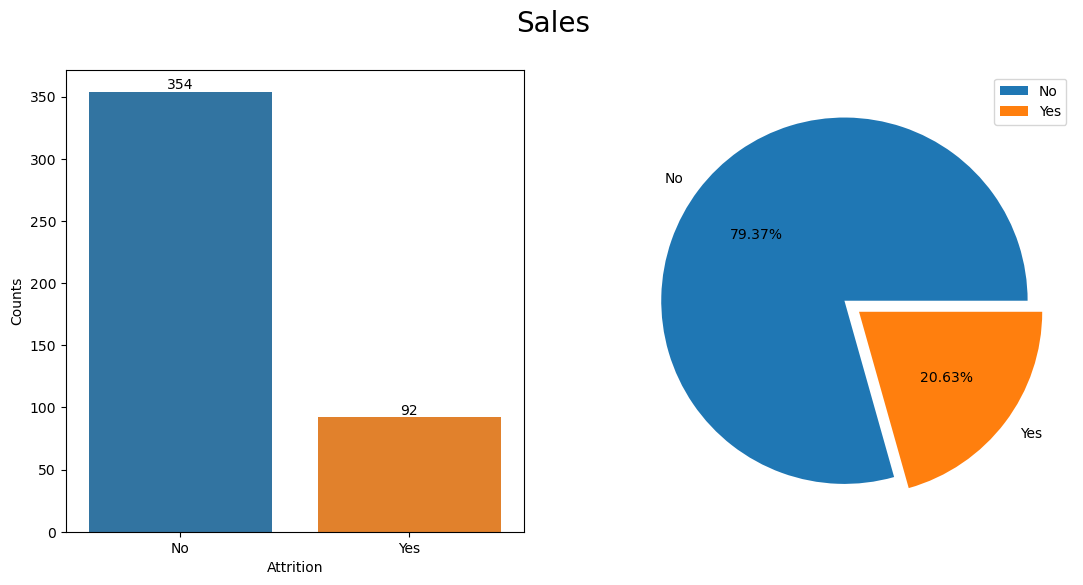

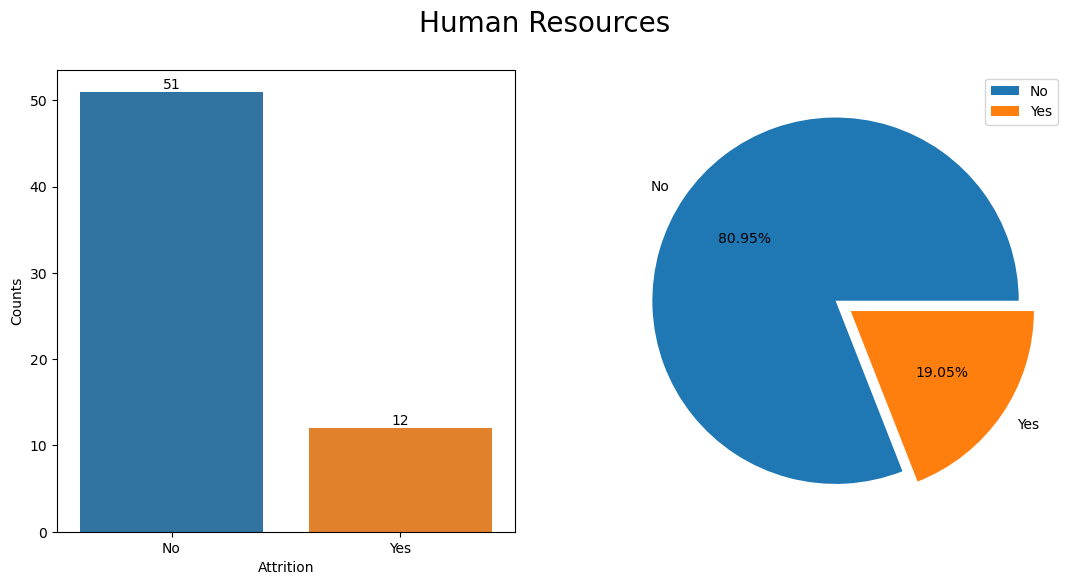

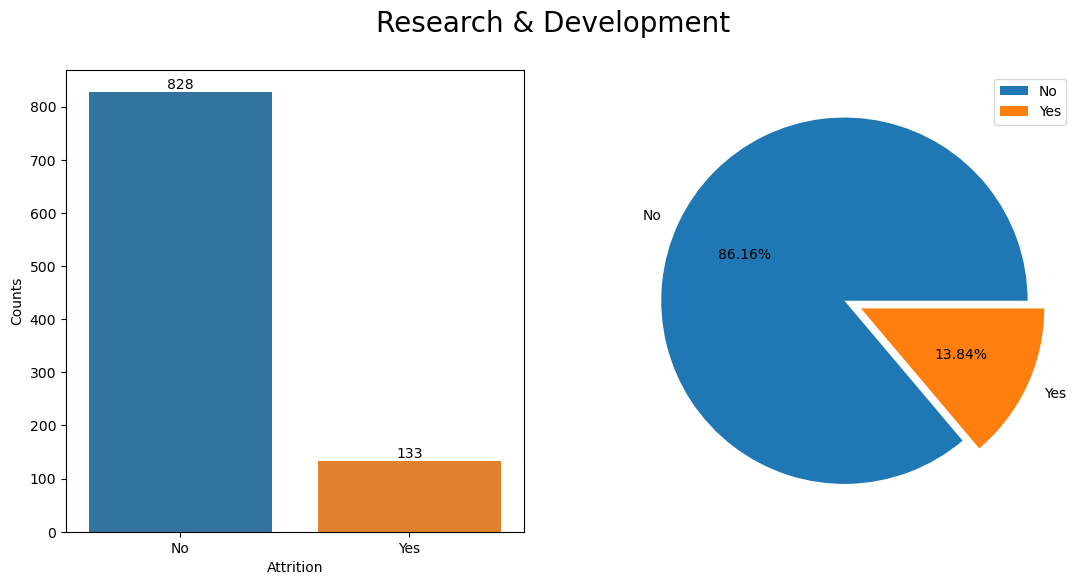

In [32]:
for dep in set(df["Department"]):
    Plot(dep)

## Is Departement has an effect on the decision of quit ?
- **To answer this question we will do Chi square test.** 

> `Null Hypothesis` $H_0$ : Departement has no effect on the decision of quit.  
> `Alternative Hypothesis` $H_a$ : Departement has a significant effect on the decision of quit.

In [33]:
 pd.crosstab(df['Department'], df['Attrition'])

Attrition                No  Yes
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92

In [34]:
chi2,CriticalChi, p_value = ChiSquared("Department")

> $X^2 = 10.796$   
> $X^2_c = 5.991$  
> $Pvalue =0.0045$

We Will reject our Null Hypothesis and accept the alternative that says ***" Departement has a significant effect on the decision of quit "***.

## Is there a significant difference among groups of differnt departments ?
- **To answer this question we will do Analysis of Variance `ANOVA` test.** 

>#### `Null hypothesis` ($H_0$)  : There is no significant difference among the groups.
>#### `Alternative hypothesis` ($H_a$) : There is a significant different among groups. 

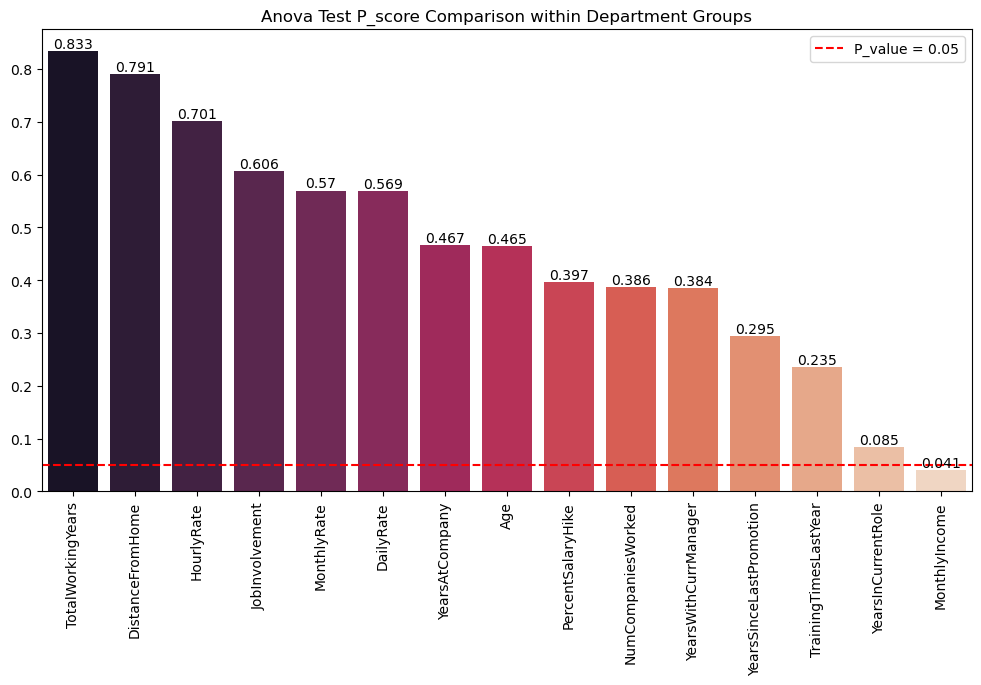

In [35]:
f_scores,p_values = ANOVA("Department")

We will reject our null hypothesis for Monthly income as the test show there is a significant difference in groups from each departmenet 

But **which pair of groups between all the groups that has a significant difference in Monthly income?**  
to know that let's do **`post_hoc`** test by help of T_test

In [36]:
sp.posthoc_ttest(df, val_col='MonthlyIncome', group_col='Department')

Sales  Research & Development  Human Resources
Sales                   1.000000                0.010998         0.599484
Research & Development  0.010998                1.000000         0.562536
Human Resources         0.599484                0.562536         1.000000

We can see that there is a significant difference in Monthly income between Sales Department and Research & Development department between employees who quit. 
We see in our EDA analysis that Sales department has the highest attrition rate and Research & Development department has the lowest one, so may be the difference between salaries between departments make employees turnover.

<div style="border-radius:30px; border:Indigo solid;color : Indigo; padding: 15px; background-color: rgba(135, 206, 235, 0.75); text-align:left">

> ## Recap:
>> * Sales department has the highest attrition rate.
>> * Research department has the highest number of employees and the lowest atrrition rate.
>> * Human Resourses has the lowest number of employees.  
>> * Departement has a significant effect on the decision of quit. 
>> * There is a significant difference in Monthly income between departments groups especially Sales department and Research & Development department

## Job Role/Level Features:
<a id="job"></a>

### Which job role has the highest attrition rate and which has the lowest?

In [37]:
jobRole = df.groupby(['JobRole', 'Attrition'])["Age"].count().reset_index(name='Counts')
jobRole = AddPercentage(jobRole,"JobRole")

In [38]:
fig =px.bar(jobRole, y ="Counts", x ="JobRole",color="Attrition")#, text='percent')
fig.show()

In [39]:
ChiSquared("JobRole")

(86.19025367670434, 15.50731305586545, 2.752481638050657e-15)

> $X^2 = 86.1903$  
> $X^2_c = 15.5073$  
> $Pvalue = 2.7525 *{10}^{-15}$

We Will reject our Null Hypothesis and accept the alternative that says ***" JobRole has a significant effect on the decision of quit "***.

### Which level role has the highest attrition rate and which has the lowest?

In [40]:
byJobLevel = df.groupby(['JobLevel', 'Attrition'])["Age"].count().reset_index(name='Counts')
byJobLevel = AddPercentage(byJobLevel,"JobLevel")
order = ["Entry Level","Junior Level","Mid Level","Senior Level","Executive Level"]
px.bar(byJobLevel, y ="Counts", x ="JobLevel",color="Attrition", text='percent',category_orders= {'JobLevel':order})

In [41]:
ChiSquared("JobLevel")

(72.52901310667391, 9.487729036781154, 6.634684715458909e-15)

> $X^2 = 72.5290$  
> $X^2_c = 9.4877$  
> $Pvalue = 6.6347*{10}^{-15}$

We Will reject our Null Hypothesis and accept the alternative that says ***" JobLevel has a significant effect on the decision of quit "***.

## Is there a significant difference among groups of differnt Job roles/Levels ?
- **Let's do `ANOVA` test to know.** 

>#### `Null hypothesis` ($H_0$)  : There is no significant difference among the groups in considering numerical value.
>#### `alternative hypothesis` ($H_a$) : There is a significant different among groups. 

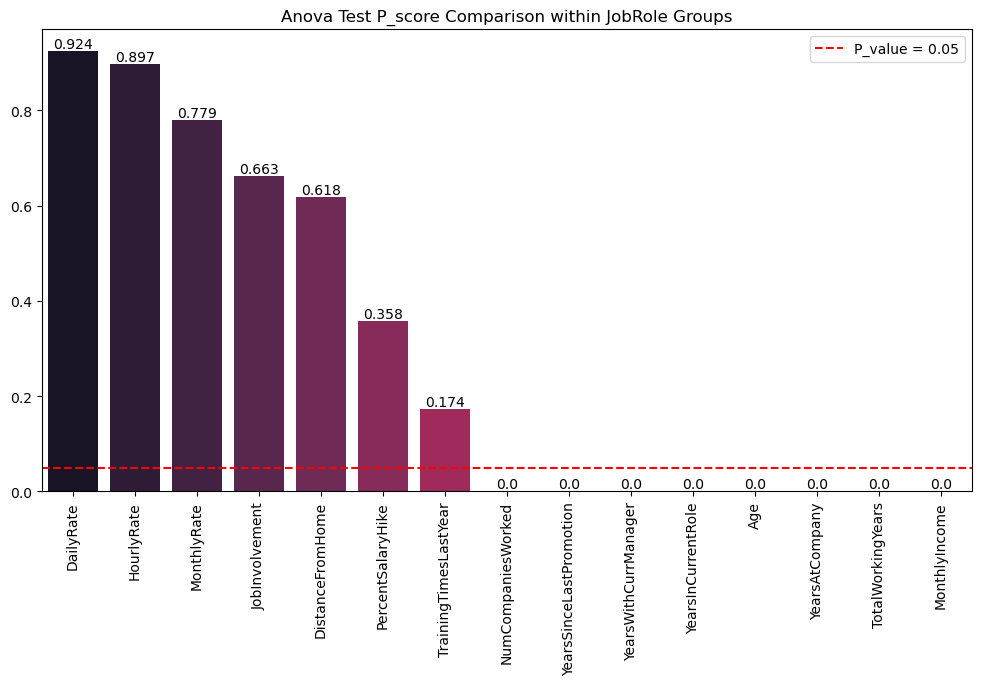

In [42]:
f_scores, p_values =ANOVA("JobRole")

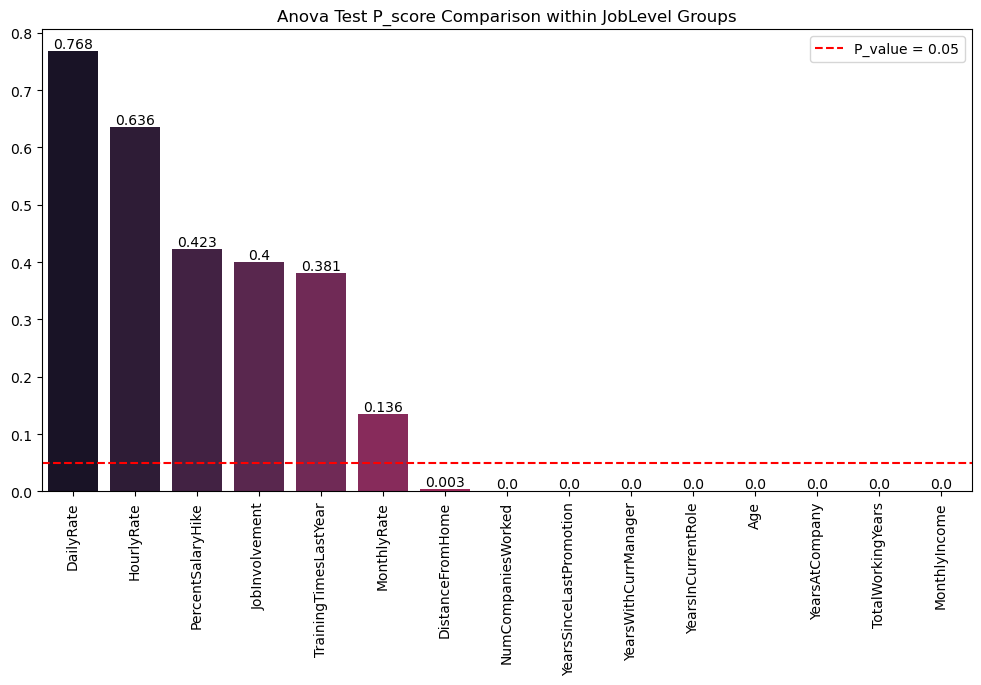

In [43]:
f_scores, p_values =ANOVA("JobLevel")

>### The test shows that there is a significant difference between groups from different job roles/levels in values such as:
>>```python
[
    "Age"                    , "MonthlyIncome"
    "NumCompaniesWorked"     , "TotalWorkingYears"
    "YearsAtCompany"         , "YearsInCurrentRole"
    "YearsSinceLastPromotion", "YearsWithCurrManager"
]
```

In [44]:
px.box(df, x="JobLevel", y="Age", title="Age distribution by different job roles")

#### For example the Above graph showes that the distribution Ages from some of job levels is significantly different which agree with ANOVA result

<div style="border-radius:30px; border:Indigo solid;color : Indigo; padding: 15px; background-color: rgba(135, 206, 235, 0.75); text-align:left">

> ## Recap:
>> * Most employees is working as Sales executive, Research Scientist or Laboratory Technician. in this organization.
>> * Highest attrition rates are in sector of Research Director, Sales Executive, Research Scientist.  
>> * Laboratory Techincian and HR job roles also has a high attrition rate  
>> * highest arrtition rates are in  Entry and mid Job level.
>> * Employees that have High Job level such as Seniors and Executive level tend to stay in company more than the others.
>> * There is a significant difference between different job roles/ levels in monthly income and values that related with time and experience such that age, total working year and other features.
>> * JobRole and JobLevel each has a significant effect on the decision of quit.

## Monthly Income:
<a id="income"></a>


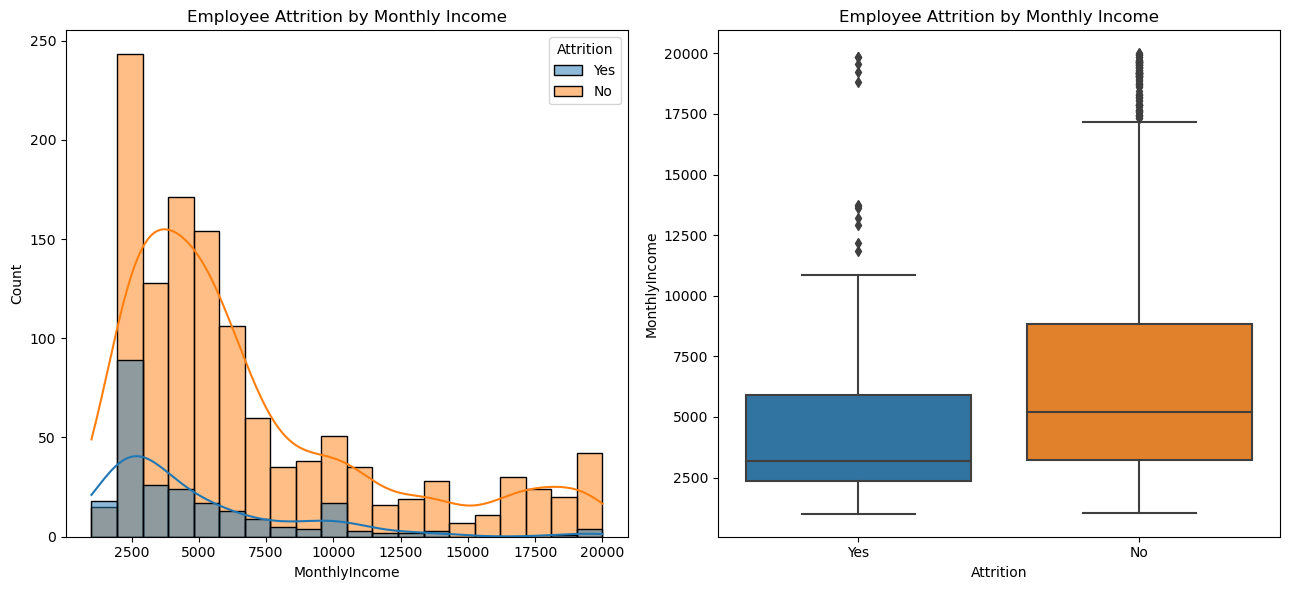

In [45]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(x="MonthlyIncome", hue="Attrition", kde=True,data=df )
plt.title("Employee Attrition by Monthly Income")

plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="MonthlyIncome",data=df)
plt.title("Employee Attrition by Monthly Income")
plt.tight_layout()
plt.show()


## To know if the Monthly income plays significant role in attrition
- **Let's do `T Test` between employees who quit and the others who stayed.** 

>#### `Null hypothesis` ($H_0$)  : Monthly income does not affect the attrition.
>#### `alternative hypothesis` ($H_a$) : Monthly income has a significant effect on attrition. 

In [46]:
TTest("MonthlyIncome", "Attrition")

(-6.203935765608938, 1.9615812836543436, 7.14736398535381e-10)

> `T Value` = $-6.204$  
> `Critical value` = $-1.96$  
> `Pvalue` = $7.1474*{10}^{-15}$

Since $T < |T_C|$ or $P << 0.05$ We Will Accept Alternative Hypothesis that says ***" Monthly income has a significant effect on attrition "***.

### Let's execute `ANOVA` test to know what categorical variables depend on monthly income

In [47]:
p_values = {}
for st in df.select_dtypes("object").columns:
    _,p_values[st],_ = SingleANOVA(st, "MonthlyIncome")

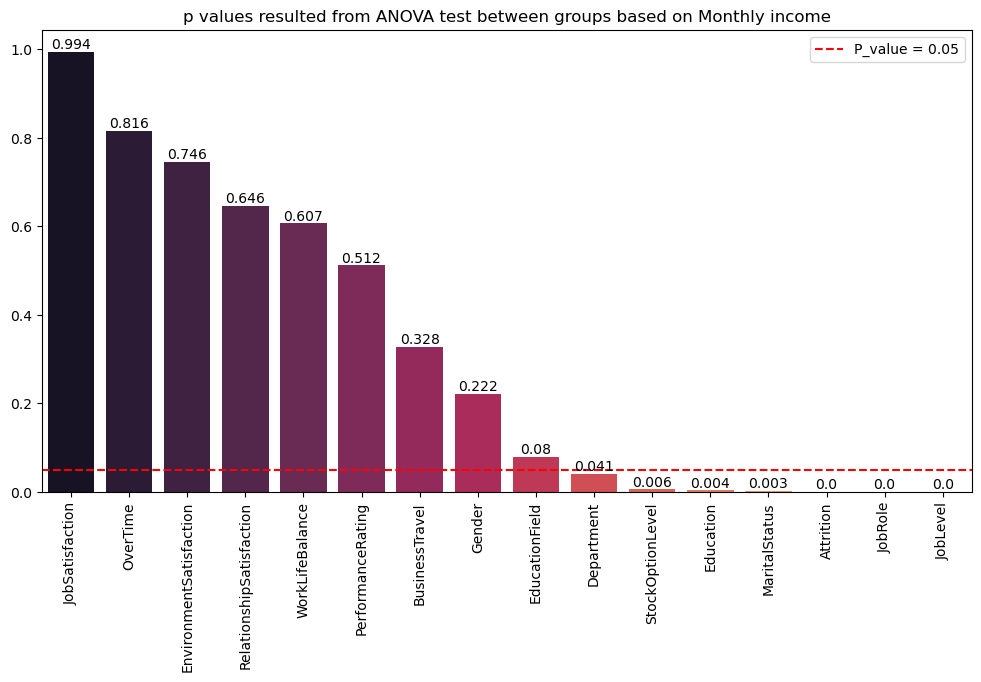

In [48]:
plotP(p_values,tit="p values resulted from ANOVA test between groups based on Monthly income")

> ### ANOVA test results showes that there is significant difference in monthly income between defferent groups of   
>### **`Department`, `Education`, `Job levels`, `Job roles`**  

### The next graphs agree with what we conclude from ANOVA test:

In [49]:
SingleANOVA("Department", "MonthlyIncome")

(3.201782929420171, 0.04097409724987449, 3.001858137213299)

>$F = 3.2017$  
>$F_c=3.0018$  
>$Pvalue=0.04097$  

#### Since $F > F_c$ or $P< 0.05$ so we can say that ***the mean of monthly income is defferent from department to another***. 

In [50]:
sp.posthoc_ttest(df, val_col='MonthlyIncome', group_col='Department').apply(lambda x:round(x, 5))

Sales  Research & Development  Human Resources
Sales                   1.00000                 0.01100          0.59948
Research & Development  0.01100                 1.00000          0.56254
Human Resources         0.59948                 0.56254          1.00000

In [51]:
fig1=px.box( df,x="Department" ,y="MonthlyIncome")
fig2=px.box( df,x="Department" ,y="MonthlyIncome", color="Attrition")
fig1.show()
fig2.show()

#### We can see significant differece between defferent departments and also between employees who quit and others who stayed in monthly income. 

In [52]:
CalcMEE("Department","MonthlyIncome" ) #95% CL

Department  Total number  Standard Deviation         Mean  \
0                   Sales           415         2867.500943  6153.732530   
1  Research & Development           869         3146.772819  5027.997699   
2         Human Resources            55         3559.526833  4864.018182   

      Max Error  
0  +/- 276.6936  
1  +/- 209.5123  
2  +/- 962.2749

In [53]:
result= SpecialCalcMEE("Department","MonthlyIncome" )

In [54]:
errors = [float(x[3:]) for x in result["Max Error"]]
px.bar(result, x="Department", y="Mean", error_y= errors, title="Bar Plot of mean Monthly income with max error of estimation")

In [55]:
px.box( df,x="JobLevel" ,y="MonthlyIncome",category_orders= {'JobLevel':order})

In [56]:
CalcMEE("JobLevel","MonthlyIncome" )

JobLevel  Total number  Standard Deviation          Mean  \
0     Junior Level           513         1161.309722   5334.621832   
1      Entry Level           526          665.460059   2721.863118   
2        Mid Level           218         1805.999233   9817.252294   
3     Senior Level           106         1816.239003  15503.783019   
4  Executive Level            69          512.383127  19191.826087   

      Max Error  
0  +/- 100.7315  
1   +/- 57.0006  
2  +/- 241.0828  
3  +/- 349.7859  
4  +/- 123.0879

In [57]:
result = SpecialCalcMEE("JobLevel","MonthlyIncome" )


In [58]:
errors = [float(x[3:]) for x in result["Max Error"]]
px.bar(result, x="JobLevel", y="Mean", error_y= errors,title="Bar Plot of mean Monthly income with max error of estimation")

In [59]:
sp.posthoc_ttest(df, val_col='MonthlyIncome', group_col='JobRole').apply(lambda x:round(x, 5))

Sales Executive  Research Scientist  \
Sales Executive                    1.00000             0.00000   
Research Scientist                 0.00000             1.00000   
Laboratory Technician              0.00000             0.97773   
Manufacturing Director             0.13262             0.00000   
Healthcare Representative          0.01607             0.00000   
Manager                            0.00000             0.00000   
Sales Representative               0.00000             0.00002   
Research Director                  0.00000             0.00000   
Human Resources                    0.00000             0.00001   

                           Laboratory Technician  Manufacturing Director  \
Sales Executive                          0.00000                 0.13262   
Research Scientist                       0.97773                 0.00000   
Laboratory Technician                    1.00000                 0.00000   
Manufacturing Director                   0.00000                 1.00000   
Healthcare Representative                0.00000                 0.45905   
Manager                                  0.00000                 0.00000   
Sales Representative                     0.00001                 0.00000   
Research Director                        0.00000                 0.00000   
Human Resources                          0.00001                 0.00000   

                           Healthcare Representative  Manager  \
Sales Executive                              0.01607  0.00000   
Research Scientist                           0.00000  0.00000   
Laboratory Technician                        0.00000  0.00000   
Manufacturing Director                       0.45905  0.00000   
Healthcare Representative                    1.00000  0.00000   
Manager                                      0.00000  1.00000   
Sales Representative                         0.00000  0.00000   
Research Director                            0.00000  0.00298   
Human Resources                              0.00000  0.00000   

                           Sales Representative  Research Director  \
Sales Executive                         0.00000            0.00000   
Research Scientist                      0.00002            0.00000   
Laboratory Technician                   0.00001            0.00000   
Manufacturing Director                  0.00000            0.00000   
Healthcare Representative               0.00000            0.00000   
Manager                                 0.00000            0.00298   
Sales Representative                    1.00000            0.00000   
Research Director                       0.00000            1.00000   
Human Resources                         0.00000            0.00000   

                           Human Resources  
Sales Executive                    0.00000  
Research Scientist                 0.00001  
Laboratory Technician              0.00001  
Manufacturing Director             0.00000  
Healthcare Representative          0.00000  
Manager                            0.00000  
Sales Representative               0.00000  
Research Director                  0.00000  
Human Resources                    1.00000

In [60]:
px.box( df,x="JobRole" ,y="MonthlyIncome")

In [61]:
result =SpecialCalcMEE("JobRole","MonthlyIncome" )

In [62]:
errors = [float(x[3:]) for x in result["Max Error"]]
px.bar(result, x="JobRole", y="Mean", error_y= errors,title="Bar Plot of mean Monthly income with max error of estimation")

In [63]:
CalcMEE("JobRole","MonthlyIncome" )

JobRole  Total number  Standard Deviation          Mean  \
0            Sales Executive           325         2338.860456   6902.901538   
1         Research Scientist           285         1036.962913   3146.663158   
2      Laboratory Technician           254         1049.060730   3168.397638   
3     Manufacturing Director           145         2676.745753   7295.137931   
4  Healthcare Representative           131         2542.550170   7528.763359   
5                    Manager            94         1751.984116  17644.212766   
6       Sales Representative            72          447.921852   2550.986111   
7          Research Director            80         2827.621369  16033.550000   
8            Human Resources            52         2438.849744   4235.750000   

      Max Error  
0  +/- 255.2325  
1  +/- 120.9048  
2  +/- 129.6326  
3  +/- 439.3761  
4  +/- 439.4846  
5  +/- 358.8411  
6  +/- 105.2565  
7  +/- 629.2563  
8  +/- 678.9801

In [64]:
sp.posthoc_ttest(df, val_col='MonthlyIncome', group_col='Education').apply(lambda x:round(x, 5))

College  Below College   Master  Bachelor   Doctor
College        1.00000        0.18144  0.09133   0.39796  0.00462
Below College  0.18144        1.00000  0.00491   0.03469  0.00057
Master         0.09133        0.00491  1.00000   0.30994  0.04484
Bachelor       0.39796        0.03469  0.30994   1.00000  0.01571
Doctor         0.00462        0.00057  0.04484   0.01571  1.00000

In [65]:
px.box( df,x="Education" ,y="MonthlyIncome",points="all")

In [66]:
CalcMEE("Education","MonthlyIncome" )

Education  Total number  Standard Deviation         Mean      Max Error
0        College           251         2368.879924  4866.195219   +/- 294.4841
1  Below College           159         3113.741827  4776.276730   +/- 487.7209
2         Master           368         3336.802687  5873.663043   +/- 342.0498
3       Bachelor           544         3966.447131  5866.963235   +/- 334.0561
4         Doctor            48         5061.430495  8277.645833  +/- 1469.6862

In [67]:
result =SpecialCalcMEE("Education", "MonthlyIncome")

In [68]:
errors = [float(x[3:]) for x in result["Max Error"]]
px.bar(result, x="Education", y="Mean", error_y= errors,title="Bar Plot of mean Monthly income with max error of estimation")

<div style="border-radius:30px; border:Indigo solid;color : Indigo; padding: 15px; background-color: rgba(135, 206, 235, 0.75); text-align:left">

> ## Recap:
>> * Most of the employees are getting paid less than 10000 in the organiation.
>> * Monthly income plays significant role in attrition.
>> * there is significant difference in monthly income between defferent groups of **`Department`, `Education`, `Job levels`, `Job roles`** 
>> * Employees who quit as a manager , manufacturing director or Research director vary greatly in monthly income.
>> * Active employees in Human resources department also vary in monthly income.  
>> * Doctors in general are vary a lot in their monthly income.

## Over Time :
<a id="over"></a>


In [69]:
AttOvered =df.groupby(["OverTime",'Attrition'],as_index=False)['Age'].count()
AttOvered.rename(columns={'Age':'Count'},inplace=True)
AttOvered=AddPercentage(AttOvered,"OverTime")
Overed =df.groupby(["OverTime"],as_index=False)['Age'].count()
Overed.rename(columns={'Age':'Count'},inplace=True)
Overed

OverTime  Count
0       No   1054
1      Yes    416

In [70]:
AttOvered

OverTime Attrition  Count  percent
0       No        No    944  89.56 %
1       No       Yes    110  10.44 %
2      Yes        No    289  69.47 %
3      Yes       Yes    127  30.53 %

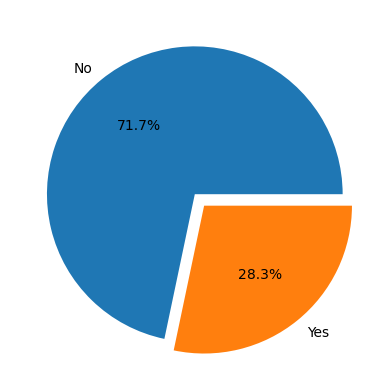

In [71]:
plt.pie(Overed["Count"], labels=Overed["OverTime"], autopct='%1.1f%%',explode=[0, 0.1])
plt.show()

In [72]:
px.bar(AttOvered,x="OverTime", y="Count", color="Attrition", text="percent")

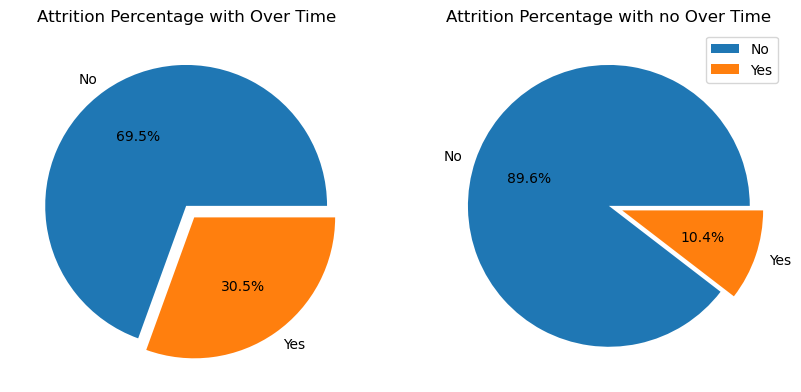

In [73]:
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax1.pie(AttOvered[AttOvered["OverTime"]== "Yes"]["Count"], labels=AttOvered[AttOvered["OverTime"]== "Yes"]["Attrition"], autopct='%1.1f%%',explode=[0, 0.1])
ax2.pie(AttOvered[AttOvered["OverTime"]== "No"]["Count"], labels=AttOvered[AttOvered["OverTime"]== "No"]["Attrition"], autopct='%1.1f%%',explode=[0, 0.1])

# Set titles for the subplots
ax1.set_title("Attrition Percentage with Over Time")
ax2.set_title("Attrition Percentage with no Over Time")
ax2.legend()
# Display the pie charts
plt.show()


In [74]:
ChiSquared("OverTime")

(87.56429365828768, 3.841458820694124, 8.15842372153832e-21)

> $X^2 = 87.5643$  
> $X^2_c = 3.8414$  
> $Pvalue = 8.1584*{10}^{-21}$

Since $X^2 >> X^2_c$ or $P << 0.05$ We Will reject our Null Hypothesis and accept the alternative that says ***" Overtime has a significant effect on the decision of quit "***.

## Is overtime option dependent on specific departments? 

In [75]:
ChiSquared("Department","OverTime")

(0.09360659979986957, 5.991464547107979, 0.9542750851354225)

> $X^2 = 0.0936$  
> $X^2_c = 5.9914$  
> $Pvalue = 0.9543$  

Since $X^2 < X^2_c$ or $P > 0.05$ we can conclude that Overtime is **independent of departments**.


In [76]:
px.box(df, x="Department", y="MonthlyIncome", color="OverTime")

## Are employees who work overtime get paid more than others who don't?

In [77]:
CalcMEE("OverTime","MonthlyIncome")

OverTime  Total number  Standard Deviation         Mean     Max Error
0      Yes           388         3502.004143  5685.396907  +/- 349.5499
1       No           969         3261.547377  5441.221878  +/- 205.6143

In [78]:
TTest("MonthlyIncome","OverTime" )

(0.2333121788024749, 1.9615812836543436, 0.8155515298402164)

>  $1- \alpha = 95\%$  
> `T Value` = $0.2333$  
> `Critical value` = $1.96$  
> `P_value` = $0.8155$

Since $T < |T_C|$ or $P > 0.05$ We can say that ***" There is no significant difference in monthly income between employees wo work over time and others who don't"***.

In [79]:
px.box(df, x="OverTime", y="MonthlyIncome", points="all")

<div style="border-radius:30px; border:Indigo solid;color : Indigo; padding: 15px; background-color: rgba(135, 206, 235, 0.75); text-align:left">

> ## Recap:
>> * Over 28% of employees in orgnization work overtime.
>> * Over 30% of employees who left the orgnization worked overtime.
>> * Overtime has a significant effect on the decision of quit.
>> * Overtime option does not depend on department.
>> * There is no significant difference in monthly income between employees wo work over time and others who don't.

## Features related with experience:
<a id="exp"></a>


In [80]:
 def Countdf(st=""):
        dfToPlot=df.groupby([st,'Attrition'])["Age"].count().reset_index(name='Counts')
        dfToPlot["Percentage"]=round((dfToPlot["Counts"]/ sum(dfToPlot["Counts"])) * 100, 2)
        dfToPlot["Percentage"]=dfToPlot["Percentage"].astype(str).apply(lambda x: x +"%")
        return dfToPlot

In [81]:
def plotIt(dfToPlot,st=""):
    ax= sns.barplot(
        x = st,
        y = 'Counts',
        hue = 'Attrition',
        data = dfToPlot)
    for i in ax.containers:
        ax.bar_label(i,) 

### Does the number of previous companies worked for affect the attrition rate? 

In [82]:
bin_edges = [0, 1, 3, 5, 10]

bin_labels = ['0-1 Companies', '2-3 companies', '4-5 companies', "5+ companies"]
df["NumCompaniesWorkedGroup"] = pd.cut(df['NumCompaniesWorked'], bins=bin_edges, labels=bin_labels)

byNumCompany= Countdf("NumCompaniesWorkedGroup")

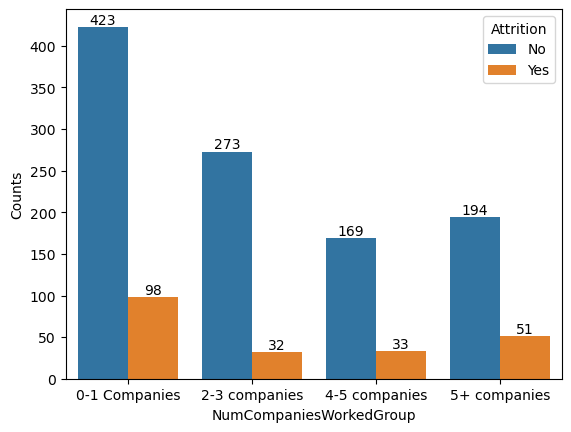

In [83]:
plotIt(byNumCompany,"NumCompaniesWorkedGroup")

In [84]:
fig=go.Figure()
byCompany=df.groupby(["NumCompaniesWorkedGroup",'Attrition'],as_index=False)['Age'].count()
byCompany.rename(columns={'Age':'Count'},inplace=True)
fig = make_subplots(rows=1, cols=4,
                        specs=[[{"type": "pie"}, {"type": "pie"},{"type": "pie"}, {"type": "pie"}]],
                        subplot_titles=('0-1 Companies', '2-3 companies','4-5 companies','5+ companies'))

fig.add_trace(go.Pie(values=byCompany[byCompany["NumCompaniesWorkedGroup"]=='0-1 Companies']['Count'],labels=byCompany[byCompany["NumCompaniesWorkedGroup"]=='0-1 Companies']['Attrition'],pull=[0,0.1],showlegend=False)
                  ,row=1,col=1)
fig.add_trace(go.Pie(values=byCompany[byCompany["NumCompaniesWorkedGroup"]=='2-3 companies']['Count'],labels=byCompany[byCompany["NumCompaniesWorkedGroup"]=='2-3 companies']['Attrition'],pull=[0,0.1],showlegend=False)
                  ,row=1,col=2)
fig.add_trace(go.Pie(values=byCompany[byCompany["NumCompaniesWorkedGroup"]=='4-5 companies']['Count'],labels=byCompany[byCompany["NumCompaniesWorkedGroup"]=='4-5 companies']['Attrition'],pull=[0,0.1],showlegend=False)
                  ,row=1,col=3)
fig.add_trace(go.Pie(values=byCompany[byCompany["NumCompaniesWorkedGroup"]=='5+ companies']['Count'],labels=byCompany[byCompany["NumCompaniesWorkedGroup"]=='5+ companies']['Attrition'],pull=[0,0.1],showlegend=True)
                  ,row=1,col=4)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,
                      legend_title_text="Attrition",title_text=f"<b style='color:black; font-size:100%;'>Employee Attrition based on number of previos companies",
                      font_family="Times New Roman",title_font_family="Times New Roman")

## To know if the number of previous companies worked for affect the attrition
- **Let's do `T Test` between employees who quit and the others who stayed.** 

>#### `Null hypothesis` ($H_0$)  : Number of previous companies worked for does not affect the attrition.
>#### `Alternative hypothesis` ($H_a$) : Number of previous companies worked for affect the attrition. 

In [85]:
TTest("NumCompaniesWorked","Attrition" )

(1.6680187953544354, 1.9615812836543436, 0.0955252620565195)

> `T Value` = $1.668$  
> `Critical value` = $1.96$  
> `P_value` = $0.09552$

Since $T < |T_C|$ or $P > 0.05$ We Will can't reject our Null Hypothesis that says ***" Number of previous companies worked for does not affect the attrition "***.

In [86]:
def PlotWithKde(st=""):
    sns.histplot(x=st,hue="Attrition",data=df,kde=True)
    plt.title(f"Employee Distribution by {st}")
    plt.show()

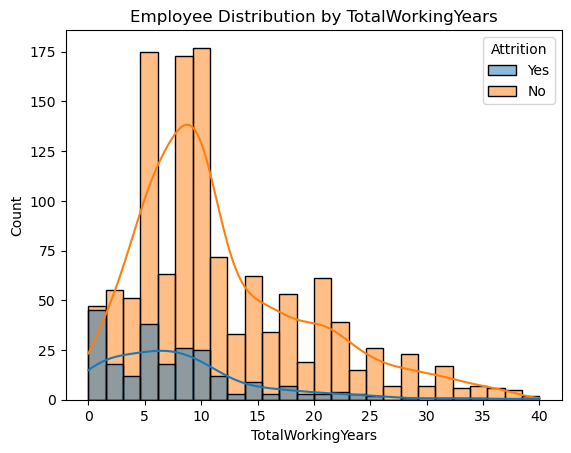

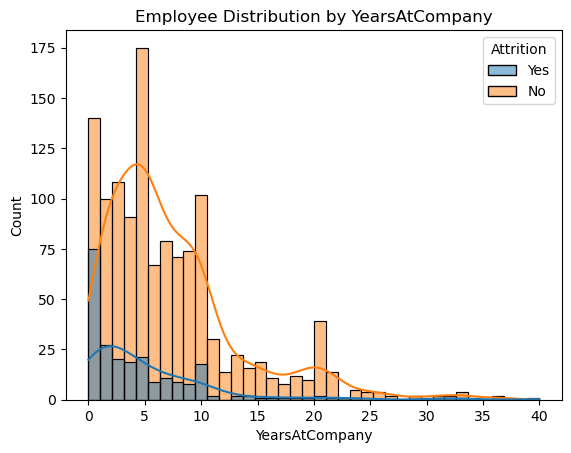

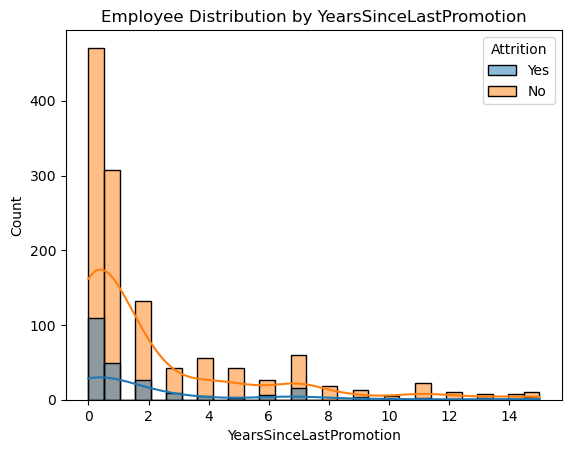

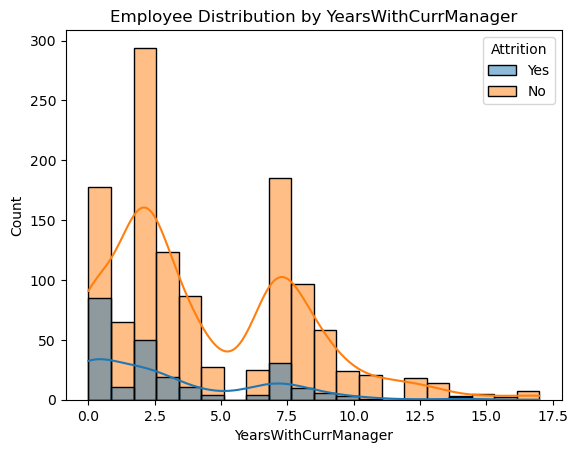

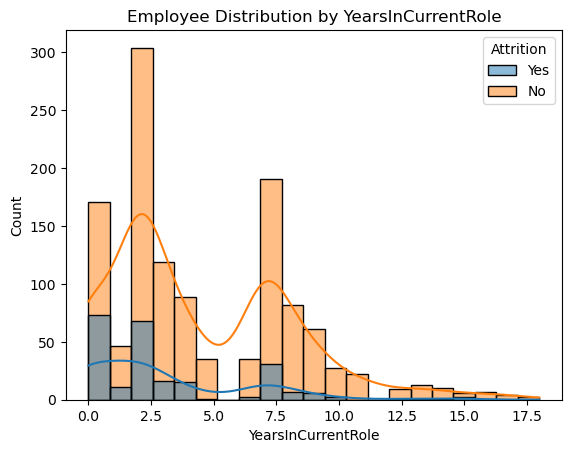

In [87]:
Times =["TotalWorkingYears","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager","YearsInCurrentRole"]
for st in Times:
    PlotWithKde(st)

## To know if years of service in different acpects affect the attrition
- **Let's do `T Test` between employees who quit and others who stayed.** 

>#### `Null hypothesis` ($H_0$)  : Attrition is independent of years of service.
>#### `alternative hypothesis` ($H_a$) : Attrition is dependent on years of service. 

In [88]:
T_Score = {}
CriticalT = {}
p_values = {}

for col in Times:
    T_Score[col],CriticalT[col],p_values[col] = TTest(col,"Attrition")

In [89]:
columns = list(T_Score.keys())
values = list(T_Score.values())
critical = list(CriticalT.values())

test_df = pd.DataFrame(
    {"Features":columns,
    "T Value":values,
    "Critical Value":critical}
                      )

test_df["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]
test_df["P_value"] = test_df["P_value"].astype(float)
test_df["Result"] = test_df["P_value"].map(lambda x:"Accept" if x > 0.05 else "Reject")
test_df

Features   T Value  Critical Value       P_value  Result
0        TotalWorkingYears -6.652255        1.961581  4.061878e-11  Reject
1           YearsAtCompany -5.196309        1.961581  2.318872e-07  Reject
2  YearsSinceLastPromotion -1.265788        1.961581  2.057900e-01  Accept
3     YearsWithCurrManager -6.059069        1.961581  1.736987e-09  Reject
4       YearsInCurrentRole -6.232038        1.961581  6.003186e-10  Reject

#### Years since last promotion seems that has no effect on attrition but other feature related with working years significantily affect attrition


<div style="border-radius:30px; border:Indigo solid;color : Indigo; padding: 15px; background-color: rgba(135, 206, 235, 0.75); text-align:left">

> ## Recap:
>> * Most of the employees have a total of 5 to 10 years of working experience.
>> * High Attrition Rate between employee with less working experience.  
>> * Most of the employees have been promoted recently.
>> * Most employees has worked for 2 : 5 or 7 : 10 years for the same role in the organization.
>> * Very few employees has worked for less than 1 year or more than 10 years in the same role.
>> * Number of previous companies worked for and years of service under same manager does not affect the attrition.
>> * Number of previous companies worked for and years since last promotion does not affect the attrition.
>> * Quit decision affects by working years.  


## Satisfaction rates:
<a id="sat"></a>


## What is the impact of Satisfaction rate on Employee attrition?

In [90]:
SatisfactionList = ['EnvironmentSatisfaction', 'JobSatisfaction','RelationshipSatisfaction']

In [91]:
fig=go.Figure()
fig = make_subplots(rows=1, cols=3,
                    specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=('Environment Satisfaction', 'Job Satisfaction','Relationship Satisfaction'))

EnvironmenSat=df.groupby(["EnvironmentSatisfaction"],as_index=False)["Age"].count()
jobSat=df.groupby(["JobSatisfaction"],as_index=False)["Age"].count()
RelationshipSat=df.groupby(["RelationshipSatisfaction"],as_index=False)["Age"].count()
fig.add_trace(go.Pie(
    values=EnvironmenSat["Age"], 
    labels=EnvironmenSat["EnvironmentSatisfaction"],
    hole=0.5,
    name='Environment Satisfaction',
    showlegend=False)
              ,row=1,col=1)

fig.add_trace(go.Pie(
    values=jobSat["Age"],
    labels=jobSat["JobSatisfaction"],
    hole=0.5,
     name='Job Satisfaction',
    showlegend=False)
              ,row=1,col=2)

fig.add_trace(go.Pie(
    values=RelationshipSat["Age"],
    labels=RelationshipSat["RelationshipSatisfaction"],
    hole=0.5,
    name='Relationship Satisfaction',
    showlegend=True)
              ,row=1,col=3)


fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,
                  legend_title_text="Satisfaction",
                  title_text='<b style="color:black; font-size:100%;">Employee Satisfaction Analysis',
                  font_family="Times New Roman",title_font_family="Times New Roman")

In [92]:
for st in SatisfactionList:
    #print(st)
    #print(ChiSquared(st))
    ChiSquared(st)

|Satisfaction              |${X^2}$ |${X^2}_c$|$Pvalue$|
:--------------------------|:-------|:--------|:--------|
|EnvironmentSatisfaction   |22.5038 |7.8147   |5.1234e-05 |
|JobSatisfaction           |17.5051 |7.8147   |0.0005|
|RelationshipSatisfaction  |5.2411  |7.8147   |0.1549 |   

In [93]:
for st in CatList[:3]:
    PlotPies(st)

## To know if level of satisfaction has a relation with monthly income.
- **Let's do `ANOVA` test.** 

>#### `Null hypothesis` ($H_0$)  : level of satisfaction does not depend on monthly income.
>#### `Alternative hypothesis` ($H_a$) : level of satisfaction  has a relation with monthly income. 

In [94]:
for st in SatisfactionList:
    #print(st)
    #print(SingleANOVA(st,"MonthlyIncome"))
    SingleANOVA(st,"MonthlyIncome")


|Satisfaction              |$F$     |$F_c$    |$Pvalue$|
:--------------------------|:-------|:--------|:-------|
|EnvironmentSatisfaction   |0.4100  |2.6109   |0.7458  |
|JobSatisfaction           |0.0270  |2.6109   |0.9940  |
|RelationshipSatisfaction  |0.5529  |2.6109   |0.6462  |   

In [95]:
for st in SatisfactionList:
    #print(st)
    #print(SpecialSingleANOVA(st,"MonthlyIncome"))
    SpecialSingleANOVA(st,"MonthlyIncome")

|Satisfaction             |$F$     |$F_c$    |     $Pvalue$           |
:--------------------------|:-------|:--------|:------------------|
|EnvironmentSatisfaction   |6.2719  |2.0158   |2.8786 $*{10}^{-7}$|
|JobSatisfaction           |5.6935  |2.0158   |1.6477 $*{10}^{-6}$|
|RelationshipSatisfaction  |6.5153  |2.0158   |1.3754 $*{10}^{-7}$|   

In [96]:
for st in SatisfactionList:
    fig= px.box(df, x=st, y="MonthlyIncome", color="Attrition")
    fig.show()

<div style="border-radius:30px; border:Indigo solid;color : Indigo; padding: 15px; background-color: rgba(135, 206, 235, 0.75); text-align:left">

> ## Recap:
>> * Most employees have high or viry high level of satisfaction.
>> * Environment and job satisfaction have an effect on attrition but relationship satisfaction don't have.
>> * The lower the level of satisfaction the more employees quit.
>> * Level of satisfaction does not depend on monthly income.
>> * Monthly income is significantly different between groups who left and others who stayed at each level of satisfaction.  

# <div style="padding:20px;color:white;margin:0;font-size:35px;text-align:center;display:fill;border-radius:10px;background-color:#c54E58;overflow:hidden; font-family: 'Lucida Console'"><b> Considering Personal reasons </b></div>
<a id="per"></a>


## Age Analysis: 
<a id="age"></a>

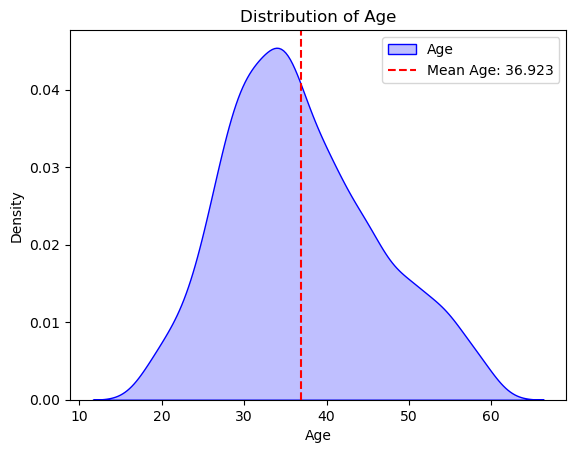

In [97]:
sns.kdeplot(x=df['Age'],color='blue',fill=True,label='Age')
plt.axvline(x=df['Age'].mean(),color='red',linestyle ="--",label='Mean Age: 36.923')
plt.legend()
plt.title('Distribution of Age')
plt.show()

### Is there a significant association between age and attrition?

In [98]:
TTest("Age", "Attrition")

(-6.178663835307217, 1.9615812836543436, 8.356308021103587e-10)

> `T Value` = $-6.1786$  
> `Critical value` = $1.961$  
> `P_value` = $8.3563 * {10}^{-10}$

Since $T > |T_C|$ or $P << 0.05$ We can say that ***" There is a significant difference in Ages between employees wo quit and others who stayed which indicates that age has an effect on attrition"***.

### Is there a significant  difference between ages of males and females overall/between active employees and others who quit?

In [99]:
TTest("Age", "Gender")

(1.3921381802920636, 1.9615812836543436, 0.16409141231818586)

In [100]:
SpecialSingleANOVA("Gender","Age")

(14.58158957406234, 2.3213794446188195e-09, 2.6109723453486713)

>Overall Test **($T$ test)**:
>> $T = 1.3921$  
>> $T_c = 1.96$  
>> $Pvalue_{T} = 0.1641$

>When taking attrition into consideration **(ANOVA)**:
>> $F = 14.5816$  
>> $F_c = 2.6109$  
>> $Pvalue_F = 2.3214*{10}^{-9}$

Since $T < |T_c| $ or $P_{T} > 0.05$ we can conclude that **no difference in ages of males or females in general** 
but when divide groups based on gender and attrition we can see that **there is a significant difference in ages between those groups since** $F > F_C$ or $P_C << 0.5$. 

In [101]:
px.box(df, x="Gender", y="Age")

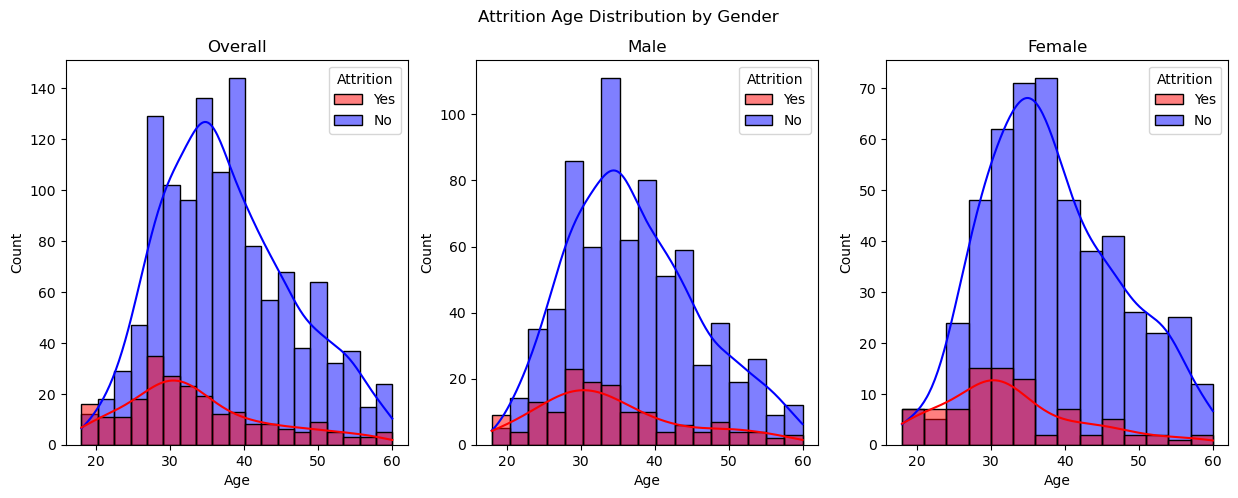

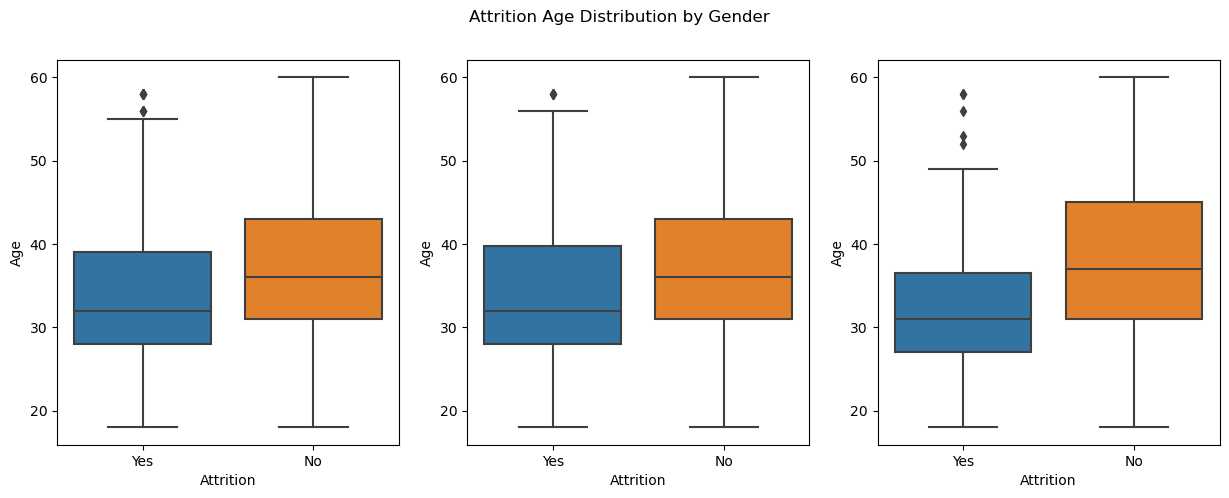

In [102]:
ShowHist()
ShowBox()

####  young employees leaves the company more compared to elder employees may me they seek for better experience or more monthly income.

### Are elder get more monthly income?

In [103]:
c= stats.pearsonr(df["MonthlyIncome"], df["Age"])
c

PearsonRResult(statistic=0.49785456692658037, pvalue=6.669539203000345e-93)

In [104]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Age'], df['MonthlyIncome'])
line = slope * df['Age'] + intercept

X =np.array(df["Age"])
y=df["MonthlyIncome"]
X_with_intercept = sm.add_constant(X)
SMmodel = sm.OLS(y, X_with_intercept).fit()

# Get predictions and prediction intervals
predictions = SMmodel.get_prediction(X_with_intercept)
pi = predictions.conf_int(obs=True)

max_error =(pi[:,1] - pi[:,0])/2   #(upper - lower)/2    0.95 CI
max_error_df = pd.DataFrame({
    'Age': df['Age'],
    'Upper_bound': line + max_error,
    'Lower_bound': line - max_error
})

fig = px.scatter(df, x='Age', y='MonthlyIncome',trendline='ols',title='Relationship between Age and Monthly Income with Prediction Interval CI = 95%')
fig.update_traces(line=dict(color="rgba(255, 0, 0,0.05)", width=180))

fig.add_trace(px.line(max_error_df, x='Age', y='Upper_bound',line_shape='linear').data[0])
fig.add_trace(px.line(max_error_df, x='Age', y='Lower_bound',line_shape='linear').data[0])
fig.add_trace(px.line( x=df['Age'], y=line,line_shape='linear').data[0])

fig.show()

### The red area define the prediction Interval region `PI`.
>### Corrlation statistis $P_r= 0.5$ which indicate that there is a moderate positive correlation between Monthly income and age.

In [105]:
fig = px.scatter(df, x='Age', y='MonthlyIncome',color="Attrition", trendline='ols'
                 , opacity=0.5,
                 title='Attrition between Age and Monthly Income')

fig.show()

<div style="border-radius:30px; border:Indigo solid;color : Indigo; padding: 15px; background-color: rgba(135, 206, 235, 0.75); text-align:left">

> ## Recap:
>> * Age distribution is a slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old.
>> * There is a significant difference in Ages between employees wo quit and others who stayed which indicates that age has an effect on attrition.
>> * No difference in ages of males or females in general but when divide groups based on gender and attrition we can see that there is a significant difference in ages between those groups.  
>> * Employees with 25 to 35 years old are more likely to quit.
>>* There is a moderate positive correlation between Monthly income and age.
>> * Employees who quit after 25 years old was payed less than others in their same age. 

## Gender Analysis:
<a id="gen"></a>

### Does Gender has a significant effect on employee attrition?

In [106]:
ChiSquared("Gender", "Attrition")

(1.1169671241970975, 3.841458820694124, 0.29057244902890855)

> $X^2 = 1.116$  
> $X^2_c = 3.841$  
> $Pvalue = 0.2905$

Since $X^2 < X^2_c$ or $P > 0.05$ We can't reject Null Hypothesis that ***" Gender has no effect on employee attrition"***.

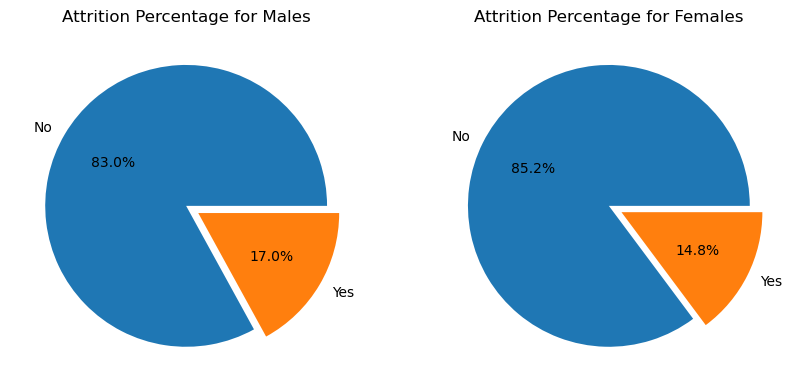

In [107]:
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

Gender =df.groupby(["Gender",'Attrition'],as_index=False)['Age'].count()
Gender.rename(columns={'Age':'Counts'},inplace=True)

ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax0.pie(Gender[Gender["Gender"]== "Male"]["Counts"], labels=Gender[Gender["Gender"]== "Male"]["Attrition"], autopct='%1.1f%%',explode=[0, 0.1])
ax1.pie(Gender[Gender["Gender"]== "Female"]["Counts"], labels=Gender[Gender["Gender"]== "Female"]["Attrition"], autopct='%1.1f%%',explode=[0, 0.1])

ax0.set_title("Attrition Percentage for Males")
ax1.set_title("Attrition Percentage for Females")

plt.show()


## Education:
<a id="edu"></a>
### From which eduactional background employees left the organization more?

In [108]:
byEduLevel = df.groupby(['Education', 'Attrition'])["Age"].count().reset_index(name='Counts')
byEduLevel = AddPercentage(byEduLevel,"Education")
EduOrder = ["Below College","College","Bachelor","Master","Doctor"]
px.bar(byEduLevel, y ="Counts", x ="Education",color="Attrition", text='percent',category_orders= {'Education':EduOrder})

>**All has almost the same probability but doctors has less probability to quit.** 

In [109]:
byEduField = df.groupby(['EducationField', 'Attrition'])["Age"].count().reset_index(name='Counts')
byEduField = AddPercentage(byEduField,"EducationField")
px.bar(byEduField, y ="Counts", x ="EducationField",color="Attrition", text='percent')

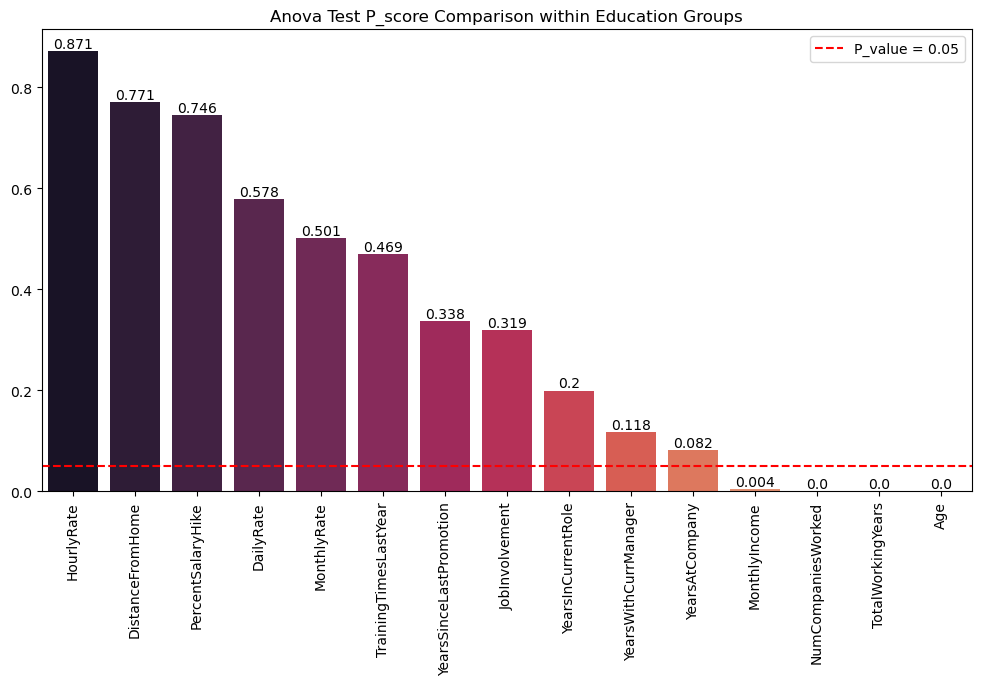

In [110]:
_,_ = ANOVA("Education")

In [111]:
ChiSquared("Education")

(3.0739613982367193, 9.487729036781154, 0.5455253376565949)

> $X^2 = 3.0739$  
> $X^2_c = 9.4877$  
> $Pvalue = 0.5455$

Since $X^2 < X^2_c$ or $P > 0.05$ We fail to reject Null Hypothesis that ***" Education has no effect on employee attrition"***.

In [112]:
ChiSquared("EducationField")

(16.024674119585427, 11.070497693516351, 0.006773980139025212)

> $X^2 = 16.0246$  
> $X^2_c = 11.0704$  
> $Pvalue = 0.0067$

Since $X^2 > X^2_c$ or $P < 0.05$ We Will Reject Null Hypothesis that ***" Education Field has a significant effect on employee attrition"***.

<div style="border-radius:30px; border:Indigo solid;color : Indigo; padding: 15px; background-color: rgba(135, 206, 235, 0.75); text-align:left">

> ## Recap:
>>* Most employees in the organization have completed Bachelors or Masters and few employees completed Doctorate degree.  
>>* Doctors has less probability to quit.
>>* Mostemployees are either from Life Science or Medical Education Field and Very few employees are from Human Resources Education Field.    
>>* Education Fields like Human Resources, Marketing, Technical is having very high attrition rate. 
>>* Employees from different eduactional background vary in thier ages and monthly income
>>* Education Field has a significant effect on employee attrition but Education hasn't.


## Marital Status:
<a id="mar"></a>


In [113]:
ChiSquared("MaritalStatus")

(46.163676540848705, 5.991464547107979, 9.45551106034083e-11)

> $X^2 = 46.163$  
> $X^2_c = 5.991$  
> $Pvalue = 9.4555 *{10}^{-11}$

Since $X^2 >> X^2_c$ or $P << 0.05$ We Will Reject Null Hypothesis that ***" Marital Status has affect employee attrition"***.

In [114]:
bus=df.groupby(["MaritalStatus",'Attrition'],as_index=False)['Age'].count()
bus.rename(columns={'Age':'Count'},inplace=True)
fig=go.Figure()
fig = make_subplots(rows=1, cols=3,
                        specs=[[{"type": "pie"}, {"type": "pie"},{"type": "pie"}]],
                        subplot_titles=('Divorced', 'Married','Single'))

fig.add_trace(go.Pie(values=bus[bus["MaritalStatus"]=='Divorced']['Count'],labels=bus[bus["MaritalStatus"]=='Divorced']['Attrition'],pull=[0,0.1],showlegend=False)
                  ,row=1,col=1)
fig.add_trace(go.Pie(values=bus[bus["MaritalStatus"]=='Married']['Count'],labels=bus[bus["MaritalStatus"]=='Married']['Attrition'],pull=[0,0.1],showlegend=False)
                  ,row=1,col=2)
fig.add_trace(go.Pie(values=bus[bus["MaritalStatus"]=='Single']['Count'],labels=bus[bus["MaritalStatus"]=='Single']['Attrition'],pull=[0,0.1],showlegend=True)
                  ,row=1,col=3)
   
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,
                      legend_title_text="Attrition",title_text=f"<b style='color:black; font-size:100%;'>Employee Attrition based on Marital Status",
                      font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()


## Distance from home:
<a id="dis"></a>


In [115]:
px.box(df, y="DistanceFromHome",x="Attrition", color="Attrition", points="all" )

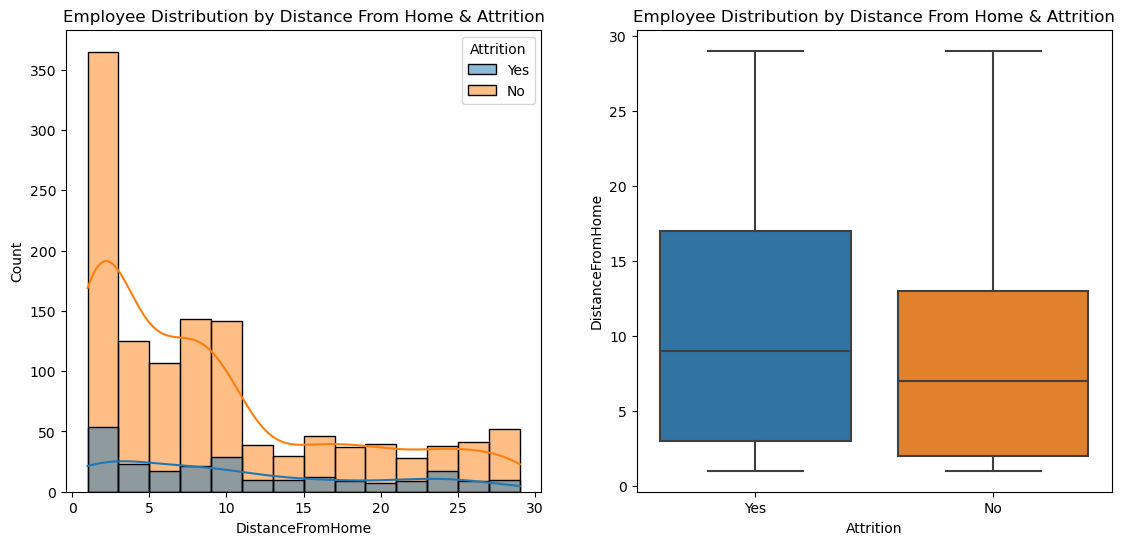

In [116]:
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x="DistanceFromHome",hue="Attrition",data=df,kde=True)
plt.title("Employee Distribution by Distance From Home & Attrition")

plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="DistanceFromHome",data=df)
plt.title("Employee Distribution by Distance From Home & Attrition")

plt.show()

In [117]:
TTest("DistanceFromHome", "Attrition")

(2.994708098265125, 1.9615812836543436, 0.0027930600802134266)

> $T = 2.9947$  
> $T_c = 1.96$  
> $Pvalue = 0.0028$

Since $T > |T_c| $ or $P < 0.05$ we can conclude that **The distance from home play a role in turnover**. 

## Work_life balance:
<a id="wlb"></a>

In [118]:
WL_Balance=df.groupby(["WorkLifeBalance"],as_index=False)["Age"].count()
fig =px.pie(
    values=WL_Balance["Age"],
   names=WL_Balance["WorkLifeBalance"],title="Work life balance rate in the orgnization",
    hole=0.5)
fig.show()

In [119]:
PlotPies("WorkLifeBalance")

In [120]:
ChiSquared("WorkLifeBalance")

(16.3250970916474, 7.814727903251179, 0.0009725698845348824)

> $X^2 = 16.3251$  
> $X^2_c = 7.8147$  
> $Pvalue = 0.0009$

Since $X^2 > X^2_c$ or $P < 0.05$ We Will Reject Null Hypothesis that ***" Work life Balance has an effect on employee attrition"***.

<div style="border-radius:30px; border:Indigo solid;color : Indigo; padding: 15px; background-color: rgba(135, 206, 235, 0.75); text-align:left">

> ## Recap:
>> * Sigle employees are more likely to quit.
>> * Marital Status has affect employee attrition.
>> * Most employees Located at distance from 0 to 10 to the company.
>>* The distance from home play a role in turnover.
>> * Most employees has a high or medium WorkLife Balance.
>> * Employees who have low WorkLife Balance are more likely to quit.
>>* Work life Balance has an effect on employee attrition.

# <div style="padding:20px;color:white;margin:0;font-size:35px;text-align:center;display:fill;border-radius:10px;background-color:#c54E58;overflow:hidden; font-family: 'Lucida Console'"><b> Statistical Analysis </b></div>
<a id="stat"></a>

## Correlation matrix:
<a id="corrmat"></a>

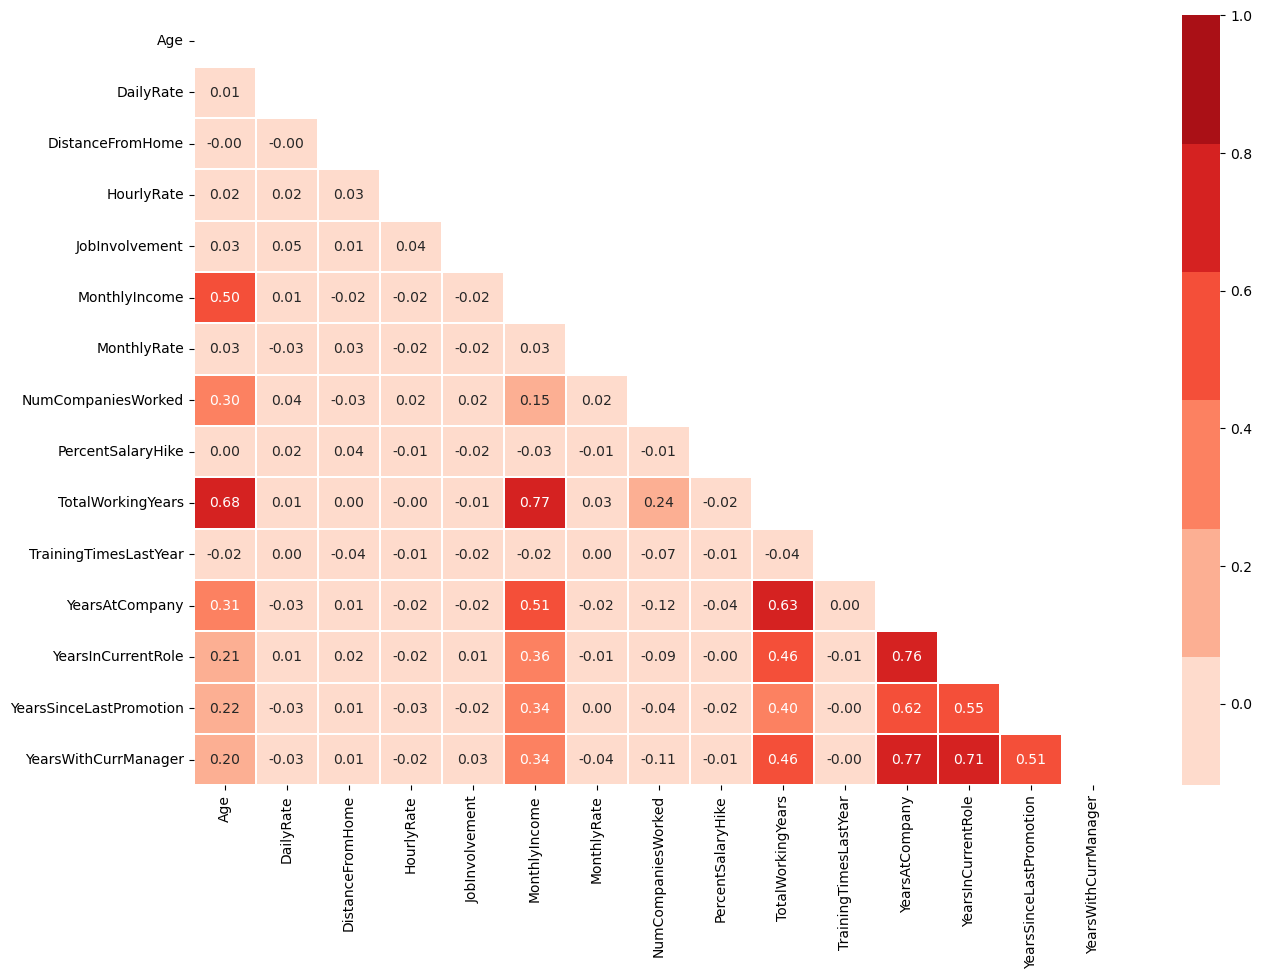

In [121]:
corr = df.select_dtypes("number").corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=1,
            mask=mask,
            annot=True, fmt='.2f',
            linewidths=.2, cmap=sns.color_palette("Reds"))
plt.show()

<div style="border-radius:30px; border:Indigo solid;color : Indigo; padding: 15px; background-color: rgba(135, 206, 235, 0.75); text-align:left">

> ## Recap:
>> * Features related with years of service are high correlated with each other.
>> * Age is moderate correlated with monthly income but highly correlated with total working years.
>> * The higher the total working years higher the monthly income.


>#### We will use this analysis when training a model to drop some features.

### We will formulate our hypothesis as:

>#### `Null hypothesis` $H_0$  : There is no association between considering numerical feature and Employee Attrition
>#### `Alternative hypothesis` $H_a$ : There is a significant different and this numerical feature affect Attrition 

## Point biserial correlation:
<a id="bi"></a>

In [122]:
CorrScore = {}
p_values = {}
for col in df.select_dtypes("number").columns:
    cc, p = stats.pointbiserialr(df["Attrition"].replace({"Yes":1,"No": 0}), df[col])
    CorrScore[col] = cc
    p_values[col] = p

In [123]:
columns = list(CorrScore.keys())
values = list(CorrScore.values())

test_df = pd.DataFrame(
    {"Features":columns,
    "Corr":values}
                      )
test_df["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]
test_df["P_value"] = test_df["P_value"].astype(float)
test_df["Result"] = test_df["P_value"].map(lambda x:"Can't Reject" if x > 0.05 else "Reject")
test_df

Features      Corr       P_value        Result
0                       Age -0.159205  8.356308e-10        Reject
1                 DailyRate -0.056652  2.985816e-02        Reject
2          DistanceFromHome  0.077924  2.793060e-03        Reject
3                HourlyRate -0.006846  7.931348e-01  Can't Reject
4            JobInvolvement -0.130016  5.677065e-07        Reject
5             MonthlyIncome -0.159840  7.147364e-10        Reject
6               MonthlyRate  0.015170  5.611236e-01  Can't Reject
7        NumCompaniesWorked  0.043494  9.552526e-02  Can't Reject
8         PercentSalaryHike -0.013478  6.056128e-01  Can't Reject
9         TotalWorkingYears -0.171063  4.061878e-11        Reject
10    TrainingTimesLastYear -0.059478  2.257850e-02        Reject
11           YearsAtCompany -0.134392  2.318872e-07        Reject
12       YearsInCurrentRole -0.160545  6.003186e-10        Reject
13  YearsSinceLastPromotion -0.033019  2.057900e-01  Can't Reject
14     YearsWithCurrManager -0.156199  1.736987e-09        Reject

>### Reject $H_0$ for those features as they has a significant effect on Attrition 
>>```python
[
 "Age"                   , "DailyRate"
 "DistanceFromHome"      , "JobInvolvement"
 "MonthlyIncome"         , "TotalWorkingYears"
 "TrainingTimesLastYear" , "YearsAtCompany"
 "YearsInCurrentRole"    , "YearsWithCurrManager"
]
```

Text(0.5, 1.0, 'P values results of correlation analysis between numerical features with Attrition')

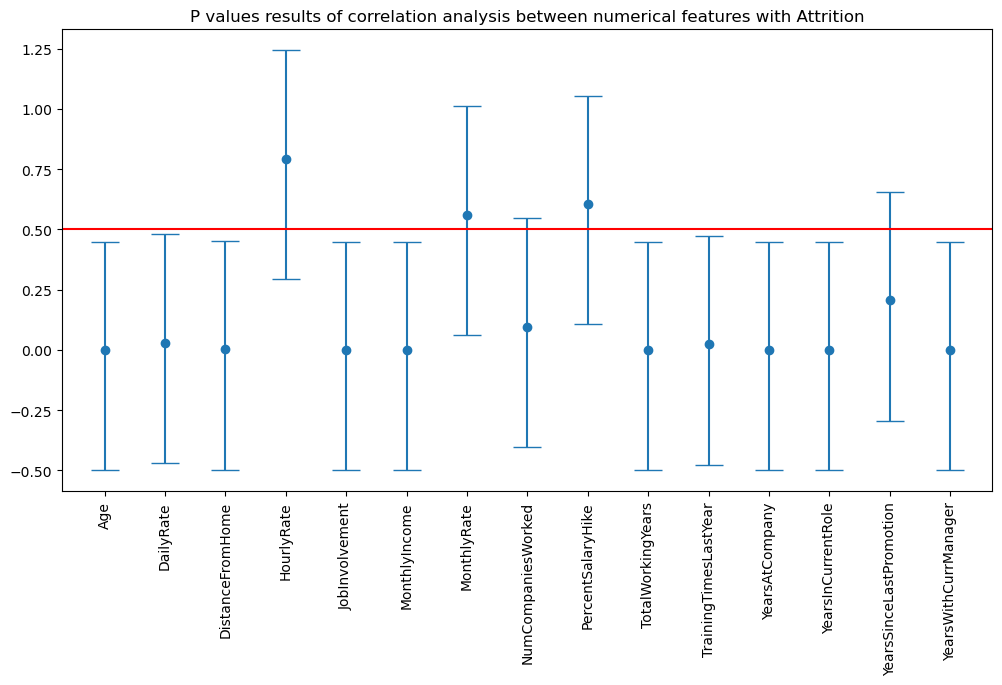

In [124]:
PlotErrors(p_values)
plt.title("P values results of correlation analysis between numerical features with Attrition")

<Axes: >

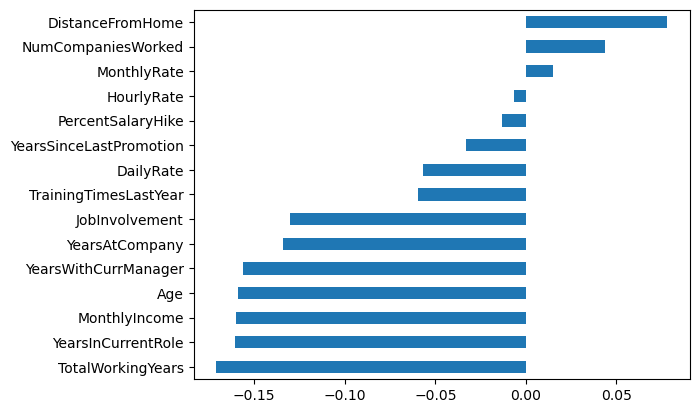

In [125]:
df.select_dtypes("number").corrwith(df["Attrition"].replace({"Yes":1,"No": 0})).sort_values().plot(kind='barh')

----
### we have already excute t test and $\chi^2$ test on most of those features along our previous analysis so let's do a summary of overall results with all features with Attrition.

----
<a id="ttest"></a>


## T Test Summary:


In [126]:
test_df, p= ApplyTTest("Attrition")
test_df

Features   T Value  Critical Value       P_value  \
0                       Age -6.178664        1.961581  8.356308e-10   
1                 DailyRate -2.174084        1.961581  2.985816e-02   
2          DistanceFromHome  2.994708        1.961581  2.793060e-03   
3                HourlyRate -0.262290        1.961581  7.931348e-01   
4            JobInvolvement -5.024140        1.961581  5.677065e-07   
5             MonthlyIncome -6.203936        1.961581  7.147364e-10   
6               MonthlyRate  0.581306        1.961581  5.611236e-01   
7        NumCompaniesWorked  1.668019        1.961581  9.552526e-02   
8         PercentSalaryHike -0.516457        1.961581  6.056128e-01   
9         TotalWorkingYears -6.652255        1.961581  4.061878e-11   
10    TrainingTimesLastYear -2.282903        1.961581  2.257850e-02   
11           YearsAtCompany -5.196309        1.961581  2.318872e-07   
12       YearsInCurrentRole -6.232038        1.961581  6.003186e-10   
13  YearsSinceLastPromotion -1.265788        1.961581  2.057900e-01   
14     YearsWithCurrManager -6.059069        1.961581  1.736987e-09   

          Result  
0         Reject  
1         Reject  
2         Reject  
3   Can't Reject  
4         Reject  
5         Reject  
6   Can't Reject  
7   Can't Reject  
8   Can't Reject  
9         Reject  
10        Reject  
11        Reject  
12        Reject  
13  Can't Reject  
14        Reject

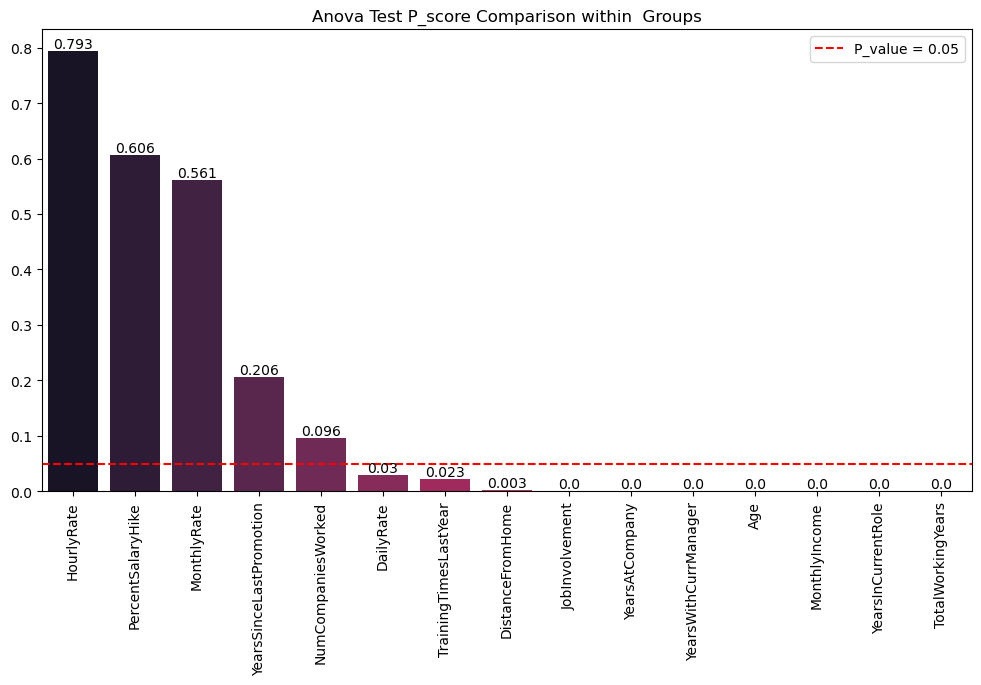

In [127]:
plotP(p,"")

>#### `Null hypothesis` $H_0$  : There is no different in considering numerical feature between employees who left
>#### and those who stayed
>#### `Alternative hypothesis` $H_a$ : There is a significant different between two groups 

>### Reject $H_0$ for those features as *there is significant difference in those features between employees who left and those who stayed* 
>>```python
[
 "Age"                   , "DailyRate"
 "DistanceFromHome"      , "JobInvolvement"
 "MonthlyIncome"         , "TotalWorkingYears"
 "TrainingTimesLastYear" , "YearsAtCompany"
 "YearsInCurrentRole"    , "YearsWithCurrManager"
 "NumCompaniesWorked"
]
```


## Chi Square ( $\chi^2$ ) test summary:
<a id="chi"></a>


In [128]:
chi2_statistic = {}
p_values = {}
criticalChis = {} 
# Perform chi-square test for each column
for col in df.select_dtypes("object").drop("Attrition", axis =1).columns:
    chi2, crit,p_value = ChiSquared(col)
    chi2_statistic[col] = chi2
    p_values[col] = p_value
    criticalChis[col] = crit

In [129]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())
critical = list(criticalChis.values())

test_df = pd.DataFrame(
    {"Features":columns,
    "Chi_2 Statistic":values,
    "Critical Value":critical}
                      )
test_df["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]
test_df["P_value"] = test_df["P_value"].astype(float)
test_df["Result"] = test_df["P_value"].map(lambda x:"Can't Reject" if x > 0.05 else "Reject")
test_df

Features  Chi_2 Statistic  Critical Value       P_value  \
0             BusinessTravel        24.182414        5.991465  5.608614e-06   
1                 Department        10.796007        5.991465  4.525607e-03   
2                  Education         3.073961        9.487729  5.455253e-01   
3             EducationField        16.024674       11.070498  6.773980e-03   
4    EnvironmentSatisfaction        22.503881        7.814728  5.123469e-05   
5                     Gender         1.116967        3.841459  2.905724e-01   
6                   JobLevel        72.529013        9.487729  6.634680e-15   
7                    JobRole        86.190254       15.507313  2.752480e-15   
8            JobSatisfaction        17.505077        7.814728  5.563005e-04   
9              MaritalStatus        46.163677        5.991465  9.455511e-11   
10                  OverTime        87.564294        3.841459  1.000000e-20   
11         PerformanceRating         0.000155        3.841459  9.900745e-01   
12  RelationshipSatisfaction         5.241068        7.814728  1.549724e-01   
13          StockOptionLevel        60.598301        7.814728  4.379390e-13   
14           WorkLifeBalance        16.325097        7.814728  9.725699e-04   

          Result  
0         Reject  
1         Reject  
2   Can't Reject  
3         Reject  
4         Reject  
5   Can't Reject  
6         Reject  
7         Reject  
8         Reject  
9         Reject  
10        Reject  
11  Can't Reject  
12  Can't Reject  
13        Reject  
14        Reject

>#### `Null hypothesis` $H_0$  : There is no association between considering categorical feature and Employee Attrition
>#### `Alternative hypothesis` $H_a$ : There is a significant different and this categorical feature affect Attrition 

>### Reject $H_0$ for those features as they has a significant effect on Attrition 
>>```python
[
 "BusinessTravel"   , "Department"
 "EducationField"   , "EnvironmentSatisfaction"
 "JobLevel"         , "JobRole"
 "JobSatisfaction"  , "MaritalStatus"
 "OverTime"         , "StockOptionLevel"
 "WorkLifeBalance"
]
```

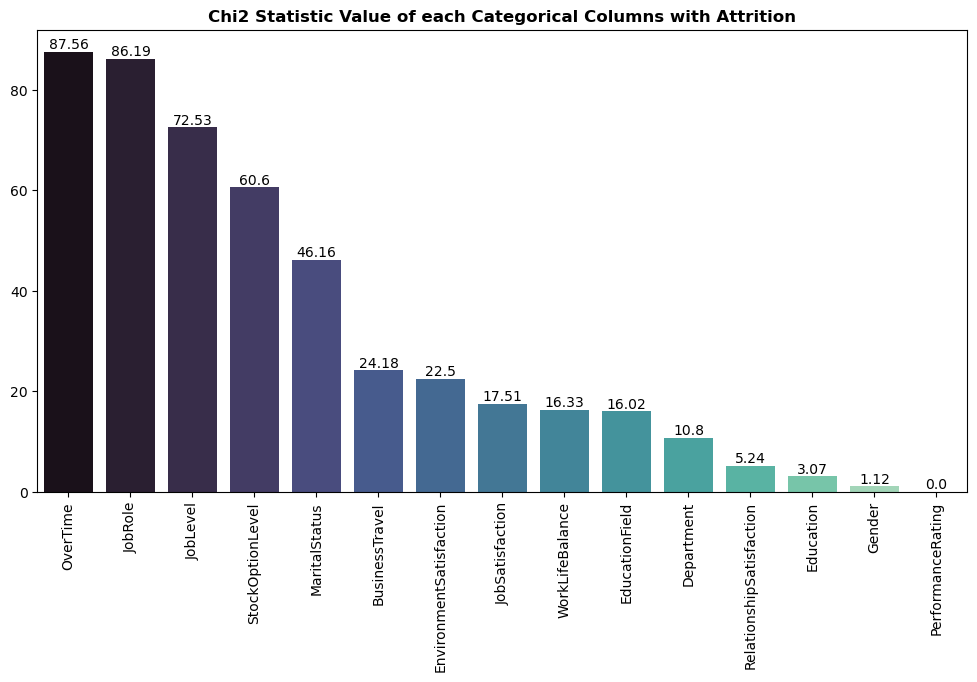

In [130]:
PlotChi(columns,values)

lower $\chi^2$ indicates no relation -> (Accept region) 
but we can not certain of that untill we compare with critical value $\chi^2_c$ 

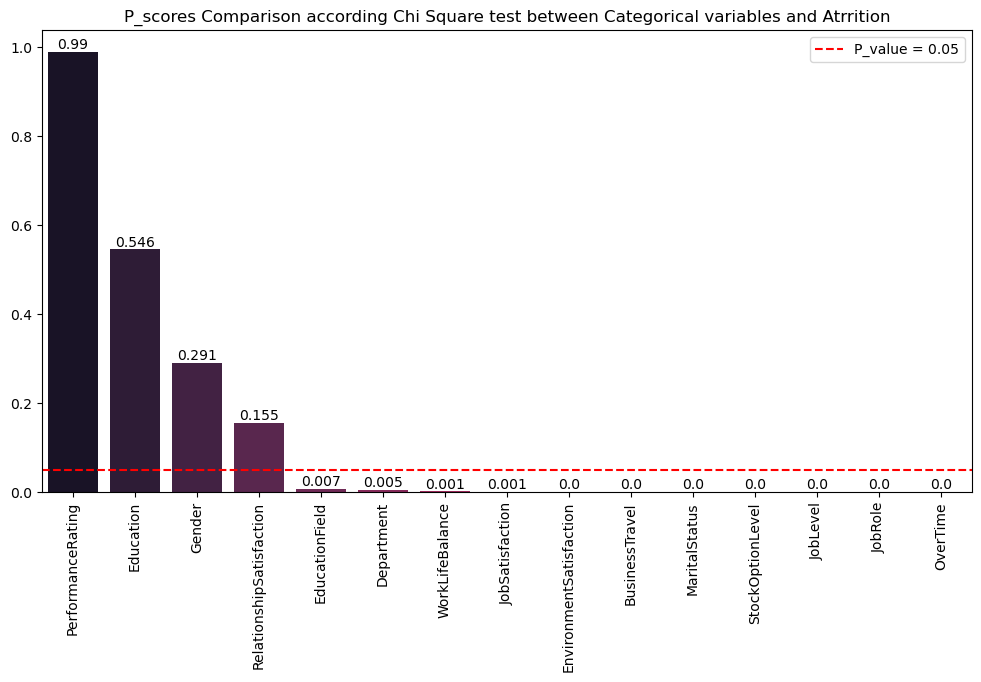

In [131]:
plotP(p_values,"",True)

# <div style="padding:20px;color:white;margin:0;font-size:35px;text-align:center;display:fill;border-radius:10px;background-color:#c54E58;overflow:hidden; font-family: 'Lucida Console'"><b> predictive Model </b></div>
<a id="model"></a>


In [132]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test,y_test_pred)
    testconfusion = confusion_matrix(y_test, y_test_pred)
    trainconfusion = confusion_matrix(y_train, y_train_pred)

    print("TRAINIG RESULTS: \n===============================")
    
    print(f"CONFUSION MATRIX:\n{trainconfusion}")
    print(f"ACCURACY SCORE:\n{acc_train:.4f}")
    print("precision score:", round(precision_score(y_train,y_train_pred),2))
    print("Recall Accuracy:", round(recall_score(y_train,y_train_pred),2))
    print("Area Under Curve AUC:", round(roc_auc_score(y_train,y_train_pred),2))
    
    print("\n\nTRAINIG RESULTS: \n===============================")
    
    print(f"CONFUSION MATRIX:\n{testconfusion}")
    print(f"ACCURACY SCORE:\n{acc_test:.4f}")
    print("precision score:", round(precision_score(y_test,y_test_pred),2))
    print("Recall Accuracy:", round(recall_score(y_test,y_test_pred),2))
    print("Area Under Curve AUC:", round(roc_auc_score(y_test,y_test_pred),2))
  

In [133]:
data =df.copy()
data.drop(columns="NumCompaniesWorkedGroup", inplace =True)

In [134]:
data["Attrition"]= data["Attrition"].replace({"Yes":1,
"No": 0})

In [135]:
X = data.drop(columns=['Attrition','HourlyRate','MonthlyRate',
                       'NumCompaniesWorked','PercentSalaryHike','YearsSinceLastPromotion',
                      'JobInvolvement','Education','Gender','YearsAtCompany','PerformanceRating','YearsWithCurrManager'], axis=1)
y = data.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, 
                                                    stratify=y)# because the data is unbalanced
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['BusinessTravel', 'Department',
                                     'EducationField',
                                     'EnvironmentSatisfaction', 'JobLevel',
                                     'JobRole', 'JobSatisfaction',
                                     'MaritalStatus', 'OverTime',
                                     'RelationshipSatisfaction',
                                     'StockOptionLevel', 'WorkLifeBalance'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [136]:
features = model.named_steps["onehotencoder"].get_feature_names_out()
importances = model.named_steps["logisticregression"].coef_[0]

In [137]:
evaluate(model, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[843  20]
 [ 83  83]]
ACCURACY SCORE:
0.8999
precision score: 0.81
Recall Accuracy: 0.5
Area Under Curve AUC: 0.74


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[357  13]
 [ 42  29]]
ACCURACY SCORE:
0.8753
precision score: 0.69
Recall Accuracy: 0.41
Area Under Curve AUC: 0.69


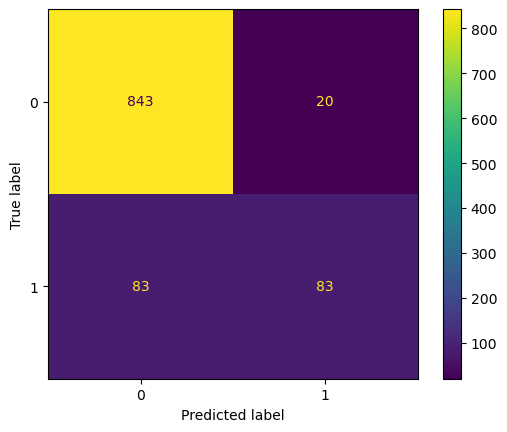

In [138]:
ConfusionMatrixDisplay.from_estimator(model, X_train, y_train)

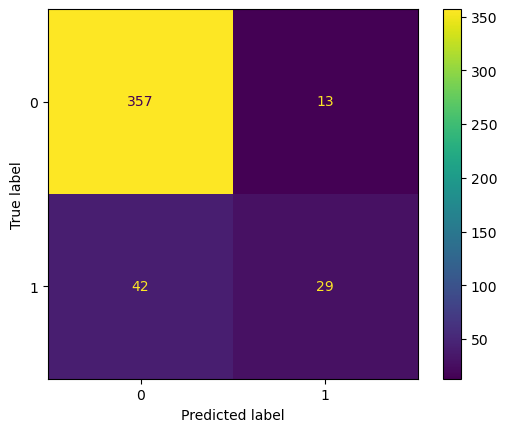

In [139]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

# <div style="padding:20px;color:white;margin:0;font-size:25px;text-align:center;display:fill;border-radius:10px;background-color:Tomato;overflow:hidden;font-family: 'Lucida Console' "><b> Bootstrap confidence interval </b></div>
<a id="boot"></a>


In [140]:
numOfSumples = 50
Accuracies = list()
for i in range(numOfSumples):
    BootX_train , Booty_train = resample(X_train, y_train)
    model.fit(BootX_train, Booty_train)
    y_test_pred = model.predict(X_test)
    score =accuracy_score(y_test, y_test_pred)
    #print("TESTING RESULTS: \n===============================")
    #print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    #print(f"ACCURACY SCORE:\n{score:.4f}")
    Accuracies.append(score)

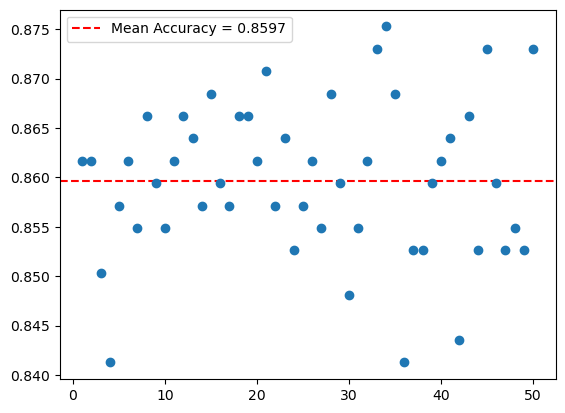

In [141]:
plt.errorbar(x = np.arange(1, len(Accuracies) +1 ,1), y= Accuracies, fmt='o')
plt.axhline(y=np.mean(Accuracies),color='red',linestyle ="--", label=f"Mean Accuracy = {round(np.mean(Accuracies),4)}")
plt.legend()

<Axes: ylabel='Count'>

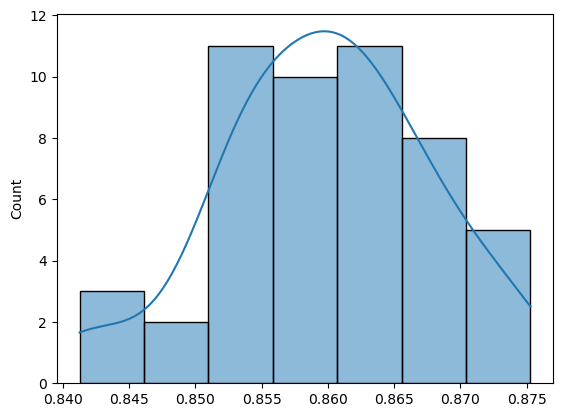

In [142]:
sns.histplot(Accuracies, kde= True)

In [143]:
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(Accuracies, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(Accuracies, p))

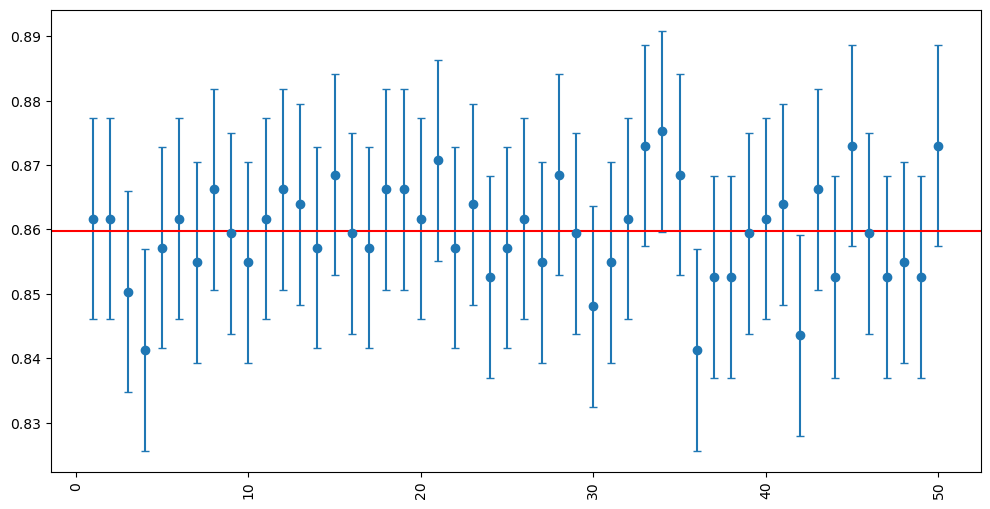

In [144]:
plt.figure(figsize=(12,6))

x= np.arange(1, len(Accuracies) +1 ,1)
y= Accuracies
y_error =(upper - lower) / 2.0
 
plt.errorbar(x, y,
             yerr = y_error,
             fmt ='o',capsize=3)
plt.xticks(rotation=90)

plt.axhline(y=np.mean(Accuracies),color='red')


In [145]:
print('At %.1f confidence interval Accuracy =  %.1f%% +/- %.1f%%' % (alpha*100,np.mean(Accuracies)*100, (upper -lower)/2.0*100))
print('Accuracy lies between %.1f%% and %.1f%%' % (lower*100, upper*100))

At 95.0 confidence interval Accuracy =  86.0% +/- 1.6%
Accuracy lies between 84.2% and 87.3%


# <div style="padding:20px;color:white;margin:0;font-size:25px;text-align:center;display:fill;border-radius:10px;background-color:Tomato;overflow:hidden;font-family: 'Lucida Console' "><b> Risk Level </b></div>
<a id="risk"></a>

In [146]:
Resuls = df.copy()

In [147]:
Resuls["AttrionLikelihood"] = model.predict_proba(X)[:, 1]

<Axes: xlabel='AttrionLikelihood', ylabel='Count'>

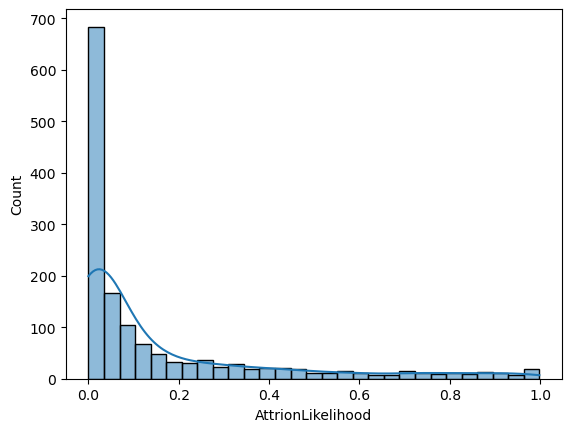

In [148]:
sns.histplot(Resuls["AttrionLikelihood"], kde=True)

In [149]:
Resuls["RiskLevel"] = Resuls["AttrionLikelihood"].astype("object").map(lambda x:"Strong" if x > 0.4 else "Medium" if x > 0.3 else "Weak" )

In [150]:
Resuls[['Attrition', 'AttrionLikelihood', 'RiskLevel' ]][42:53]

Attrition  AttrionLikelihood RiskLevel
42       Yes           0.884607    Strong
43        No           0.109554      Weak
44        No           0.045862      Weak
45       Yes           0.000026      Weak
46        No           0.061084      Weak
47        No           0.166111      Weak
48        No           0.466441    Strong
49        No           0.081682      Weak
50       Yes           0.800803    Strong
51       Yes           0.908685    Strong
52        No           0.057744      Weak

In [151]:
pd.crosstab(Resuls["RiskLevel"] ,Resuls["Attrition"])


Attrition    No  Yes
RiskLevel           
Medium       44   22
Strong       82  134
Weak       1107   81

# <div style="padding:20px;color:white;margin:0;font-size:25px;text-align:center;display:fill;border-radius:10px;background-color:Tomato;overflow:hidden;font-family: 'Lucida Console' "><b> Features importances </b></div>

<a id="import"></a>

Text(0.5, 1.0, 'Feature Importance')

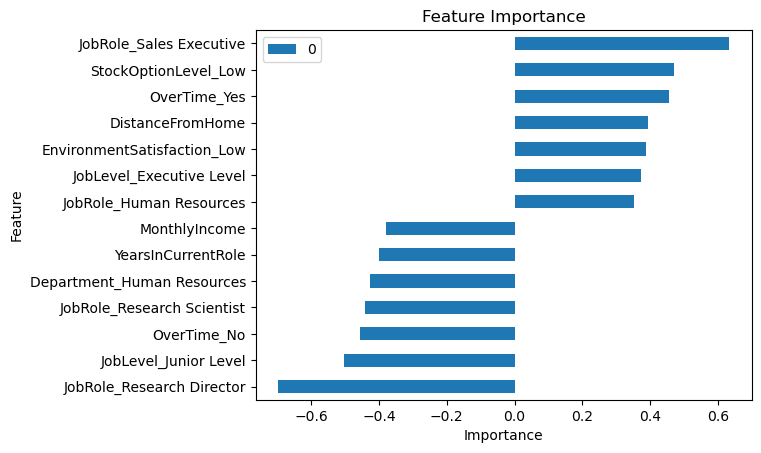

In [152]:
feat_imp = pd.Series(importances, index=features).sort_values()
SortedDF= pd.DataFrame(feat_imp)
MaxMin =pd.concat([SortedDF.head(7), SortedDF.tail(7)], axis=0)

MaxMin.plot(kind="barh")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")

# <div style="padding:20px;color:white;margin:0;font-size:25px;text-align:center;display:fill;border-radius:10px;background-color:Tomato;overflow:hidden;font-family: 'Lucida Console' "><b> Interactive Dashboard</b></div>
<a id="inter"></a>


In [153]:
def make_prediction(age, businesstravel,dailyrate,department,distanceFromHome,
                    educationfield,environmentsatisfaction,
                    joblevel,jobrole,jobsatisfaction,maritalstatus,
                    monthlyincome,overtime,relationshipsatisfaction,
                    stockoptionlevel,totalworkingyears,trainingtimeslastyear,
                    worklifebalance,yearsincurrentrole
                   ):
    data={
        'Age':age,
        'BusinessTravel':businesstravel,
        'DailyRate':dailyrate,
         'Department':department,
        'DistanceFromHome' :distanceFromHome,
       'EducationField':educationfield,
        'EnvironmentSatisfaction':environmentsatisfaction,
        'JobLevel':joblevel,
        'JobRole':jobrole,
        'JobSatisfaction':jobsatisfaction,
        'MaritalStatus':maritalstatus,
       'MonthlyIncome':monthlyincome,
        'OverTime':overtime,
        'RelationshipSatisfaction':relationshipsatisfaction,
       'StockOptionLevel':stockoptionlevel,
        'TotalWorkingYears':totalworkingyears,
        'TrainingTimesLastYear':trainingtimeslastyear,
        'WorkLifeBalance':worklifebalance,
         'YearsInCurrentRole':yearsincurrentrole
    }
    df=pd.DataFrame(data,index=[0])
    prediction = model.predict_proba(df)[:, 1][0]
    if prediction > 0.4:
        Risk ="Strong"
    elif prediction > 0.3:
        Risk = "Medium"
    else:
        Risk ="Weak" 
    return f"This employee has a {Risk} Risk to quit with Probability = {round(prediction,5)}."

## NOTE: 
### This cell is interactive so it will not work on view, you can download or copy then run it to see the right output.

In [154]:
interact(
    make_prediction,
    age=IntSlider(min=X_train["Age"].min(), max=X_train["Age"].max(),value=X_train["Age"].mean()),
    businesstravel=Dropdown(options=sorted(X_train["BusinessTravel"].unique())),
    dailyrate=IntSlider(min=X_train["DailyRate"].min(), max=X_train["DailyRate"].max(),value=X_train["DailyRate"].mean()),    
    department=Dropdown(options=sorted(X_train["Department"].unique())),
    distanceFromHome=IntSlider(min=X_train["DistanceFromHome"].min(), max=X_train["DistanceFromHome"].max(),value=X_train["DistanceFromHome"].mean()),
    educationfield=Dropdown(options=sorted(X_train["EducationField"].unique())),
    environmentsatisfaction=Dropdown(options=sorted(X_train["EnvironmentSatisfaction"].unique())),
    joblevel=Dropdown(options=sorted(X_train["JobLevel"].unique())),
    jobrole=Dropdown(options=sorted(X_train["JobRole"].unique())),
    jobsatisfaction=Dropdown(options=sorted(X_train["JobSatisfaction"].unique())),
    maritalstatus=Dropdown(options=sorted(X_train["MaritalStatus"].unique())),
    monthlyincome=IntSlider(min=X_train["MonthlyIncome"].min(), max=X_train["MonthlyIncome"].max(),value=X_train["MonthlyIncome"].mean()),
    overtime=Dropdown(options=sorted(X_train["OverTime"].unique())),
    relationshipsatisfaction=Dropdown(options=sorted(X_train["RelationshipSatisfaction"].unique())),
    stockoptionlevel=Dropdown(options=sorted(X_train["StockOptionLevel"].unique())),
    totalworkingyears=IntSlider(min=X_train["TotalWorkingYears"].min(), max=X_train["TotalWorkingYears"].max(),value=X_train["TotalWorkingYears"].mean()),
    trainingtimeslastyear=IntSlider(min=X_train["TrainingTimesLastYear"].min(), max=X_train["TrainingTimesLastYear"].max(),value=X_train["TrainingTimesLastYear"].mean()),
    worklifebalance=Dropdown(options=sorted(X_train["WorkLifeBalance"].unique())),
    yearsincurrentrole=IntSlider(min=X_train["YearsInCurrentRole"].min(), max=X_train["YearsInCurrentRole"].max(),value=X_train["YearsInCurrentRole"].mean()),

);

interactive(children=(IntSlider(value=36, description='age', max=60, min=18), Dropdown(description='businesstr…

## A better dashboard with gradio library 

In [155]:
Inputs = [
        gr.Slider(
           int(X_train["Age"].min()), int(X_train["Age"].max()),
           value=int(X_train["Age"].mean()),
            label="Age"
        ),
        gr.Dropdown(
            sorted(X_train["BusinessTravel"].unique()),
            value =X_train["BusinessTravel"].iloc[0],
            label="Business Travel"
        ),
        gr.Slider(
            int( X_train["DailyRate"].min() ), int(X_train["DailyRate"].max()),
            value=int(X_train["DailyRate"].mean()),
            label="Daily Rate"
        ),
        gr.Dropdown(
            sorted(X_train["Department"].unique()),
            value =X_train["Department"].iloc[0],
            label="Department"
        ),
        gr.Slider(
            int(X_train["DistanceFromHome"].min()),int( X_train["DistanceFromHome"].max()),
            value=int(X_train["DistanceFromHome"].mean()),
            label="Distance From Home"
        ),
        gr.Dropdown(
            sorted(X_train["EducationField"].unique()),
            value =X_train["EducationField"].iloc[0],
            label="Education Field"
        ),
        gr.Radio(
            sorted(X_train["EnvironmentSatisfaction"].unique()),
            value =X_train["EnvironmentSatisfaction"].iloc[0],
            label="Environment Satisfaction"
        ),
        gr.Dropdown(
            sorted(X_train["JobLevel"].unique()), 
            value =X_train["JobLevel"].iloc[0],
            label="Job Level"
        ),
        gr.Dropdown(
            sorted(X_train["JobRole"].unique()),
            value =X_train["JobRole"].iloc[0],
            label="Job Role"
        ),
        gr.Radio(
            sorted(X_train["JobSatisfaction"].unique()),
            value =X_train["JobSatisfaction"].iloc[0],
            label="Job Satisfaction"
        ),
        gr.Radio(
            sorted(X_train["MaritalStatus"].unique()),
            value =X_train["MaritalStatus"].iloc[0],
            label="Marital Status"
        ),
        gr.Slider(
            int(X_train["MonthlyIncome"].min()), int(X_train["MonthlyIncome"].max()),
            value=int(X_train["MonthlyIncome"].mean()),
            label="Monthly Income"
        ),
        gr.Radio(
            sorted(X_train["OverTime"].unique()),
            value =X_train["OverTime"].iloc[0],
            label="OverTime"
        ),
        gr.Radio(
            sorted(X_train["RelationshipSatisfaction"].unique()),
            value =X_train["RelationshipSatisfaction"].iloc[0],
            label="Relationship Satisfaction"
        ),
        gr.Radio(
            sorted(X_train["StockOptionLevel"].unique()),
            value =X_train["StockOptionLevel"].iloc[0],
            label="Stock Option Level"
        ),
        gr.Slider(
            int(X_train["TotalWorkingYears"].min()), int(X_train["TotalWorkingYears"].max()),
            value=int(X_train["TotalWorkingYears"].mean()), step =1,
            label="Total Working Years"
        ),
        gr.Slider(
            int(X_train["TrainingTimesLastYear"].min()),int( X_train["TrainingTimesLastYear"].max()),
            value=int(X_train["TrainingTimesLastYear"].mean()), step =1, 
            label="Training Times Last Year"
        ),
        gr.Radio(
            sorted(X_train["WorkLifeBalance"].unique()),
            value =X_train["WorkLifeBalance"].iloc[0],
            label="WorkLifeBalance"
        ),
        gr.Slider(
            int(X_train["YearsInCurrentRole"].min()), int(X_train["YearsInCurrentRole"].max()),
            value=int(X_train["YearsInCurrentRole"].mean()), step =1,
            label="Years in Current Role"
        ),
        
]

demo = gr.Interface( fn = make_prediction , inputs=Inputs, outputs="text", live = True, theme="soft")

demo.launch(share=True)


Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://306531d2920c0eb885.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Refrences : 
<a id="ref"></a>

> * <a href="https://www.indeed.com/career-advice/career-development/reasons-employees-leave">16 Reasons Why Employees Choose To Leave Their Jobs</a>    
> * <a href = "https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/anova/"> ANOVA Test: Definition, Types, Examples </a> 
> * <a href ="https://www.scribbr.com/statistics/chi-square-tests/"> Chi square test.</a>     
> * <a href ="https://www.scribbr.com/statistics/t-test/"> Introduction to T_test.</a>   
> * <a href ="https://www.statisticshowto.com/point-biserial-correlation/"> point biserial correlation.</a>   
> * <a href ="https://www.geeksforgeeks.org/understanding-logistic-regression/">Understanding logistic regression.</a>   
> * <a href ="https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148">Introduction to logistic regression.</a>   
> * <a href ="https://towardsdatascience.com/calculating-confidence-interval-with-bootstrapping-872c657c058d"> Bootstrap confidence interval in machine learning.</a>   

![End](https://img.freepik.com/free-photo/thank-you-card-collage-concept_23-2150444861.jpg?w=900&t=st=1702249761~exp=1702250361~hmac=82fde4d718abbc95e1344656da26b8ed64c3170a48a1c030b3bd2b776585863e)
